# Lab Assignment Five: Wide and Deep Network Architectures

### TEAM MEMBERS: Catherine Magee, Morgan Mote, Luv Patel

>In this lab, you will select a prediction task to perform on your dataset, evaluate two different deep learning architectures and tune hyper-parameters for each architecture. If any part of the assignment is not clear, ask the instructor to clarify. This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

## Dataset Selection

>- Select a dataset similarly to lab one. That is, the dataset must be table data. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression.

## Wide_Deep Grading Rubric

#### Preparation (4 points total)
>- [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
>- [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed).
>- [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.
>- [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice.
#### Modeling (5 points total)
>- [2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.
>- [2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.
>- [1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  
#### Exceptional Work (1 points total)
>- 5000 students: You have free reign to provide additional analyses.
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

## Criteria - Long Descriptions

#### Preprocessing
>Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

#### Crossed Groups
>Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

#### Evaluation Metric
>Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

#### Splitting Data
>Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

#### Three Wide / Deep Models
>Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

#### Deep Layers
>Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.

#### MLP Comparison
>Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). For classification tasks, use the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations. Use proper statistical method to compare the performance of different models.

#### Exceptional Credit
>Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). For classification tasks, use the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations. Use proper statistical method to compare the performance of different models.

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install tensorflow

In [3]:
!pip install pydot

In [4]:
!pip install graphviz

In [5]:
import os
import textwrap
import itertools
from IPython.display import display, HTML, Markdown
import platform
import subprocess

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pydot
import graphviz

# Imbalanced-Learn
from imblearn.over_sampling import SMOTE

# Sklearn
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    make_scorer,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models
from tensorflow.keras.layers import (
    Dense,
    Activation,
    Input,
    Embedding,
)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Dataset and Class Variables

In [6]:
# Prints Tensorflow and Keras version
os.environ['KMP_DUPLICATE_LIB_OK']='True'
print(f"Tensorflow Version: {tf.__version__}")
#print(f"Keras Version: {keras.__version__}")

Tensorflow Version: 2.14.0


Data Source URL:
https://console.cloud.google.com/marketplace/details/usafacts-public-data/covid19-us-cases?filter=solution-type:dataset&filter=category:covid19&id=3eaff9c5-fbaf-47bb-a441-89db1e1395ab&project=still-nebula-398202

In [7]:
# Reads data into memory
df = pd.read_csv("./COVID-19_cases_plus_census_lab5.csv")

In [8]:
def print_df_list_of_features():
    columns = df.columns.to_list()
    features = "Features: "
    for i, col in enumerate(columns):
        if i > 0:
            features += f', "{col}"'
        else:
            features += f'"{col}"'
    print(features)

print_df_list_of_features()

Features: "county_fips_code", "county_name", "state", "state_fips_code", "date", "confirmed_cases", "deaths", "geo_id", "nonfamily_households", "family_households", "median_year_structure_built", "rent_burden_not_computed", "rent_over_50_percent", "rent_40_to_50_percent", "rent_35_to_40_percent", "rent_30_to_35_percent", "rent_25_to_30_percent", "rent_20_to_25_percent", "rent_15_to_20_percent", "rent_10_to_15_percent", "rent_under_10_percent", "total_pop", "male_pop", "female_pop", "median_age", "white_pop", "black_pop", "asian_pop", "hispanic_pop", "amerindian_pop", "other_race_pop", "two_or_more_races_pop", "not_hispanic_pop", "commuters_by_public_transportation", "households", "median_income", "income_per_capita", "housing_units", "vacant_housing_units", "vacant_housing_units_for_rent", "vacant_housing_units_for_sale", "median_rent", "percent_income_spent_on_rent", "owner_occupied_housing_units", "million_dollar_housing_units", "mortgaged_housing_units", "families_with_young_childre

In [9]:
# Prints the size of the dataframe to output
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.\n")

The dataset contains 3142 rows and 259 columns.



### Creation of New Features & Sorting of the Dataset

In [10]:
# Filter rows with confirmed_cases > 0
df = df[df['confirmed_cases'] > 0].copy()

# Calculate rates per 1000 people
# Rate calculation added as new attributes
df['cases_per_1000'] = (df['confirmed_cases'] / df['total_pop']) * 1000
df['deaths_per_1000'] = (df['deaths'] / df['total_pop']) * 1000
df['death_per_case'] = df['deaths'] / df['confirmed_cases']

# Sort the DataFrame by confirmed_cases in descending order
df = df.sort_values(by='confirmed_cases', ascending=False)

In [11]:
# Select important attributes
selected_columns = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income',
                    'median_age', 'cases_per_1000', 'deaths_per_1000', 'death_per_case', 'female_pop', 'male_pop']
df = df[selected_columns]

In [12]:
def get_feature_col_counts():
    cols = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income',
                    'median_age', 'cases_per_1000', 'deaths_per_1000', 'female_pop', 'male_pop']
    print(f"{' Value Counts '.center(40, '*')}\n")
    for col in cols:
        print(df[col].value_counts(), "\n")
    print(f"{''.center(40, '*')}")

get_feature_col_counts()

************* Value Counts *************

Washington County      30
Jefferson County       25
Franklin County        24
Lincoln County         23
Jackson County         22
                       ..
Wapello County          1
Webster Parish          1
Carteret County         1
San Patricio County     1
Loving County           1
Name: county_name, Length: 1875, dtype: int64 

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
PA     67
AL     67
FL     67
SD     66
CO     64
LA     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
AK     27
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      4
DE      3
DC      1
Name: state, dtype: int64 

1147    5
632     4
114     4
990     4
232     4
       ..
4554    1
4544    1
4543  

### Prints Unique Features

In [13]:
# Prints the unique values for categorical data
columns = df.columns.to_list()
for column in columns:
    unique_vals = list(df[column].unique())
    if len(unique_vals) < 10:
        print(f"{column}: {unique_vals}")
print()

### Missing Values

In [14]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(str(missing_values)+ "\n")

print("These are the columns with missing data:" + str(df.columns[df.isnull().any()].tolist()))

Missing Values:
county_name        0
state              0
confirmed_cases    0
deaths             0
total_pop          0
median_income      0
median_age         0
cases_per_1000     0
deaths_per_1000    0
death_per_case     0
female_pop         0
male_pop           0
dtype: int64

These are the columns with missing data:[]


<AxesSubplot:>

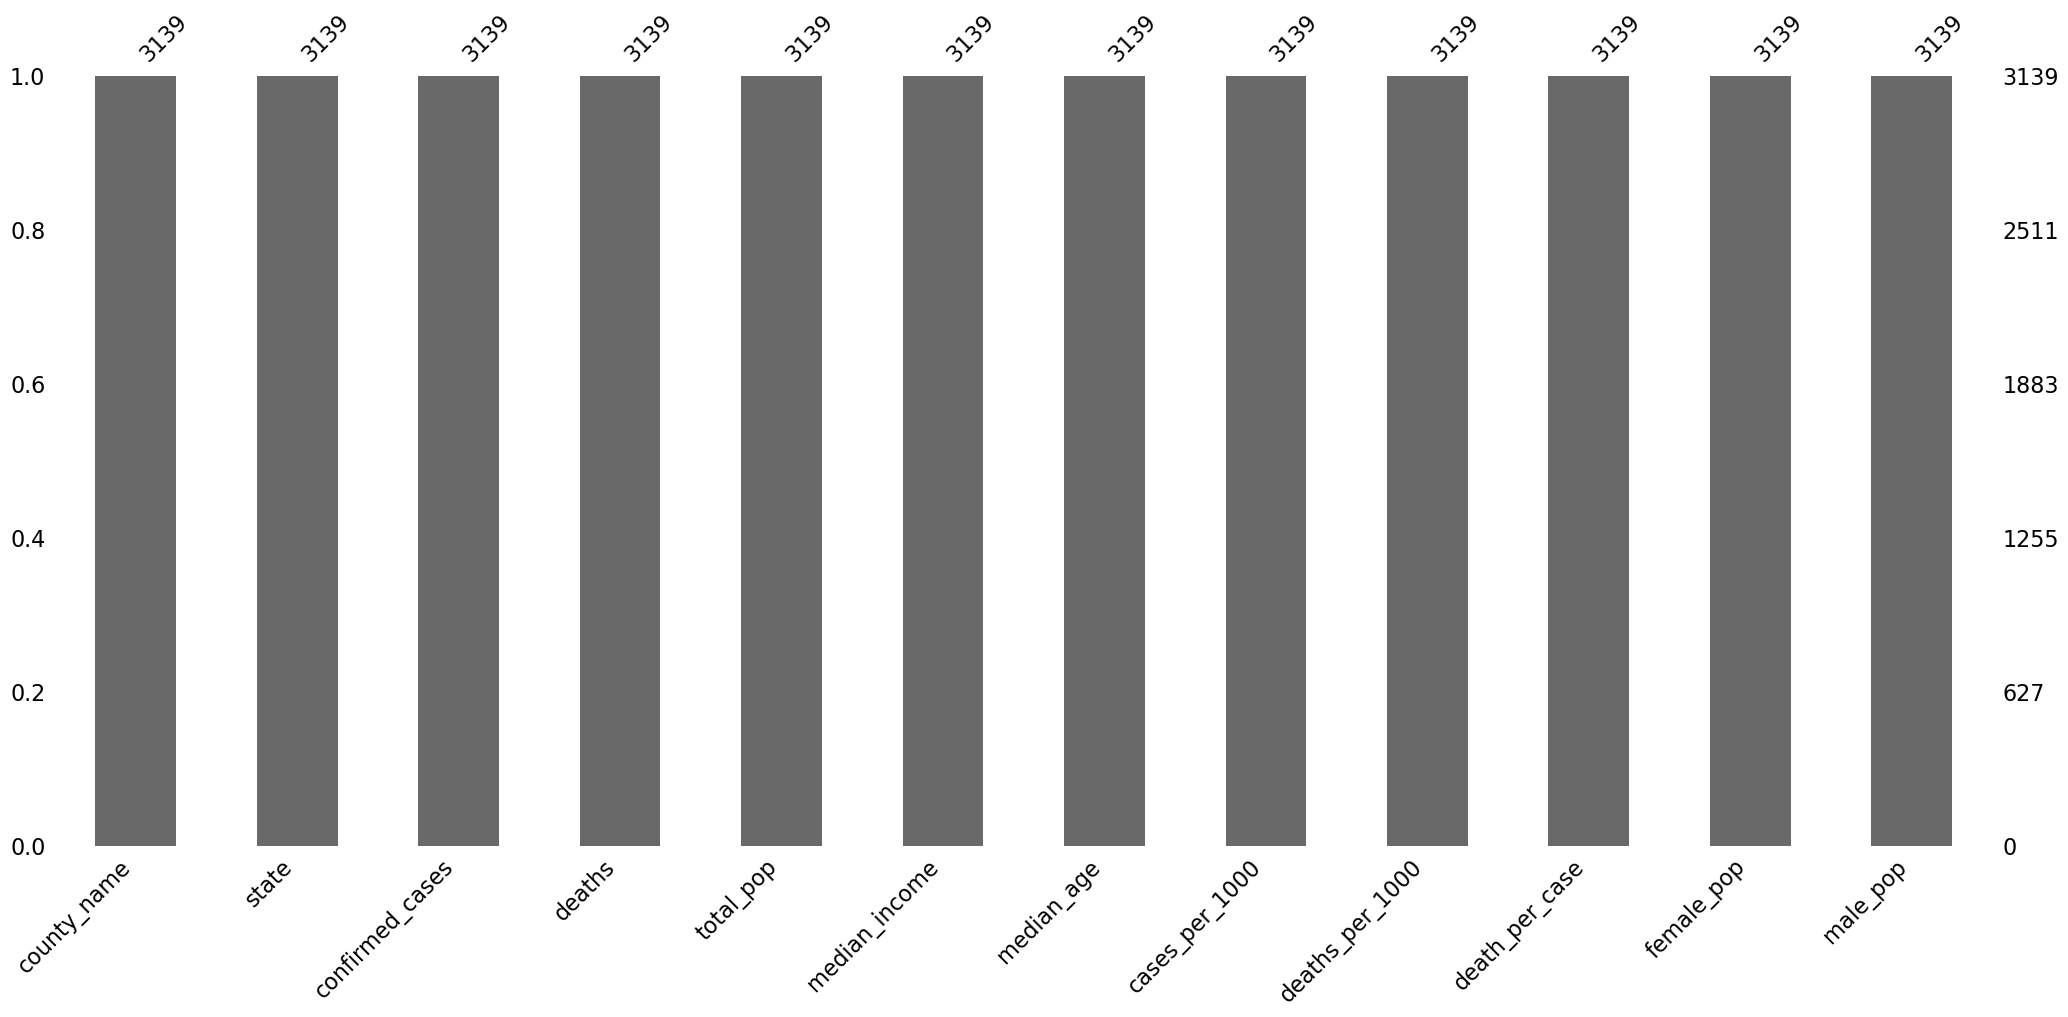

In [15]:
import missingno as msno

msno.bar(df)

### Check for Duplicates

In [16]:
def check_for_duplicate_entries():
    return df.duplicated().any()


print(
    "Duplicates Found!"
) if check_for_duplicate_entries() is True else print("No Duplicates Found!")

No Duplicates Found!


### Summary of the Dataset for Analysis

In [17]:
# Prints the datatypes for each column
print("Datatypes")
print(df.dtypes)

Datatypes
county_name         object
state               object
confirmed_cases      int64
deaths               int64
total_pop          float64
median_income      float64
median_age         float64
cases_per_1000     float64
deaths_per_1000    float64
death_per_case     float64
female_pop         float64
male_pop           float64
dtype: object


The data types used for this project are described as follows:

- county_name           Name of the respective county within the specific state
- state                 Name of the respective state within the USA
- confirmed_cases       The total number of confirmed cases of COVID-19
- deaths                The total number of deaths related to COVID-19
- total_pop             The total population of people within the geographic area being surveyed
- median_income         The median income of the total population
- median_age            The median age of the total population
- cases_per_1000        The number of confirmed cases per 1000 people
- deaths_per_1000       The number of deaths per 1000 people
- death_per_case        The number of deaths per confirmed cases of COVID-19
- female_pop            The total number of females in the total population
- male_pop              The total number of males in the total population

In [18]:
# Provide summary information on continuous variables
print(df.describe())

       confirmed_cases        deaths     total_pop  median_income  \
count     3.139000e+03   3139.000000  3.139000e+03    3139.000000   
mean      7.566138e+03    124.945524  1.022627e+05   49736.142083   
std       2.811232e+04    481.075014  3.284340e+05   13145.573334   
min       1.000000e+00      0.000000  7.400000e+01   19264.000000   
25%       7.985000e+02     12.000000  1.097100e+04   41120.000000   
50%       1.917000e+03     32.000000  2.571400e+04   48038.000000   
75%       4.955500e+03     77.000000  6.752450e+04   55758.000000   
max       1.002614e+06  13936.000000  1.010572e+07  129588.000000   

        median_age  cases_per_1000  deaths_per_1000  death_per_case  \
count  3139.000000     3139.000000      3139.000000     3139.000000   
mean     41.148901       76.850959         1.336791        0.017567   
std       5.372906       28.503892         0.922729        0.011150   
min      21.600000        2.461564         0.000000        0.000000   
25%      37.900000     

# Cross-Product Features

[1] https://krishnayogi.medium.com/the-power-of-feature-crosses-real-life-use-cases-and-code-

"Feature crosses involve the combination of two or more individual features to create new
synthetic features." These newly formed features show the relationship between the original features,
"allowing the model to capture non-linear patterns that might be missed by considering the features
in isolation." There are many ways to create different feature crosses in the cells below you can see
our group performed a feature cross by multiplying the values of two features and by mulitplying the
values of three and five features. More specifically we did four feature crosses one two feature cross
between confirmed cases and deaths. Two three feature crosses one between total population, median age
and cases per 1000 and the other between total population median age and deaths per 1000. The fourth
feature cross we did was between female population, male population, median income, confirmed cases,
and deaths.

Since the cause of positive COVID19 cases is unknown to scientist we used our best assumption of what
features synergy could create a new informative and predictive feature. We chose confirmed cases and deaths
to provide further insight into the relationship between confirmed casese and death. Next we chose to cross
the total population median age and the cases per 1000 value. In doing this we hoped to discover an
informative feature that can explain why certain age groups can lead to higher rates of positive COVID19
cases. Similar to the cross between total population, median age, and cases per 1000 we looked at the
relationship between total population median age and deaths per 1000. In doing this we hope to discover
a predicitve feature about what age in the population is most likely to die from COIVD19. Lastly we did a
feature cross between female/male population, median age, median income, confirmed cases, and deaths to
hopefully uncover an informative feature on the synergy between gender, income, and death by COVID19.
Since there are no known causes of death from COVID19 we had to use our best assumption to decide which
crossed features would provide the most insightful disovery.

In [19]:
# Defines cross columns. Very little is known to the team about what
# contributes to heart disease. Using our best assumptions, these features
# appear sufficiently related for cross analysis.
x_col_list_1 = ['confirmed_cases', 'deaths']
x_col_list_2 = ['total_pop', 'median_age', 'cases_per_1000']
x_col_list_3 = ['total_pop', 'median_age', 'deaths_per_1000']
x_col_list_4 = ['female_pop', 'male_pop', 'median_income', 'confirmed_cases', 'deaths']
x_cols = [x_col_list_1] + [x_col_list_2] + [x_col_list_3] + [x_col_list_4]

In [20]:
# Copies original dataframe
df_cross = df.copy()

In [21]:
# Re-defines feature 'deaths' to be a string value for crossing
df_cross['deaths'] = df_cross['deaths'].apply(lambda v: "Y" if v == 1 else "N")

In [22]:
# Defines encoder for cross labeling
encoder = LabelEncoder()

In [23]:
# Defines a placeholder for cross column names
x_col_features = []

In [24]:
# Applies column crossing
for cols in x_cols:
    # Ensures that all values are strings for joining
    cross_col = df_cross[cols].astype(str).apply(lambda x: '_'.join(x), axis=1)

    # Formats column name
    col_name = '_X_'.join(cols)  # Adding X to indicate a cross

    # Encodes values as integers
    df_cross[col_name] = encoder.fit_transform(cross_col)

    # Appends to list
    x_col_features.append(col_name)


In [25]:
# Feature re-assignment to move the target variable to the last column
tmp_features = df_cross.loc[:, ~df_cross.columns.isin(['deaths_per_1000'])]
tmp_target = df_cross['deaths_per_1000']
df_cross = tmp_features
df_cross['deaths_per_1000'] = tmp_target

In [26]:
# Displays updated dataframe with crossed features
df_cross

,county_name,state,confirmed_cases,deaths,total_pop,median_income,median_age,cases_per_1000,death_per_case,female_pop,male_pop,confirmed_cases_X_deaths,total_pop_X_median_age_X_cases_per_1000,total_pop_X_median_age_X_deaths_per_1000,female_pop_X_male_pop_X_median_income_X_confirmed_cases_X_deaths,deaths_per_1000
287,Los Angeles County,CA,1002614,N,10105722.0,61015.0,36.0,99.212506,0.013900,5126081.0,4979641.0,2,16,16,2218,1.379021
832,Cook County,IL,435888,N,5238541.0,59426.0,36.4,83.207901,0.019601,2697837.0,2540704.0,1664,2288,2288,1379,1.630988
245,Maricopa County,AZ,425844,N,4155501.0,58580.0,36.0,102.477174,0.015130,2100037.0,2055464.0,1644,1993,1993,1038,1.550475
430,Miami-Dade County,FL,347965,N,2702602.0,46338.0,39.5,128.751847,0.013283,1390605.0,1311997.0,1433,1405,1405,479,1.710204
2782,Harris County,TX,286356,N,4525519.0,57791.0,33.1,63.275836,0.013357,2274459.0,2251060.0,1173,2108,2108,1148,0.845207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Hinsdale County,CO,15,N,820.0,53056.0,57.2,18.292683,0.000000,436.0,384.0,530,2868,2868,2000,0.000000
1678,Petroleum County,MT,11,Y,453.0,46429.0,51.7,24.282561,0.090909,218.0,235.0,216,2109,2109,1097,2.207506
2543,King County,TX,11,N,289.0,56964.0,32.7,38.062284,0.000000,139.0,150.0,215,1502,1502,476,0.000000
1981,Harding County,NM,8,N,546.0,35096.0,58.4,14.652015,0.000000,255.0,291.0,2453,2344,2344,1302,0.000000


In [27]:
# Defines a new dataframe with normalized and labeled features.
# Other tasks assigned later require joining columns and then encoding
# then, such as when using feature crossing.
df_processed = df_cross.copy()

In [28]:
# Defines the continuous features
continuous_features = ['median_age',
                       'median_income',
                       'confirmed_cases',
                       'cases_per_1000',
                       'death_per_case',]

In [29]:
# Normalize the continuous features
scaler = StandardScaler()
for column in continuous_features:
    xfrm_column = scaler.fit_transform(df_processed[[column]])
    df_processed[column] = xfrm_column

In [30]:
# Defines the categorical features
categorical_features = ['county_name',
                        'state']

In [31]:
# Initialize a dictionary to hold the encoders
encoder_dict = {}

# Encode the categorical features
for column in categorical_features:
    # Create a new encoder for the column
    encoder = LabelEncoder()
    # Fit and transform the column data
    df_processed[column] = encoder.fit_transform(df_processed[column])
    # Store the encoder in the dictionary
    encoder_dict[column] = encoder


In [32]:
# Describe dataframe after normalization and label encoding.
df_processed.describe().round(2)

,county_name,state,confirmed_cases,total_pop,median_income,median_age,cases_per_1000,death_per_case,female_pop,male_pop,confirmed_cases_X_deaths,total_pop_X_median_age_X_cases_per_1000,total_pop_X_median_age_X_deaths_per_1000,female_pop_X_male_pop_X_median_income_X_confirmed_cases_X_deaths,deaths_per_1000
count,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.00,3139.0,3139.0,3139.0,3139.00
mean,937.94,26.04,-0.00,102262.73,-0.00,-0.00,-0.00,0.00,51922.56,50340.18,1278.04,1569.0,1569.0,1569.0,1.34
std,526.21,14.18,1.00,328434.05,1.00,1.00,1.00,1.00,167217.54,161254.58,746.18,906.3,906.3,906.3,0.92
min,0.00,0.00,-0.27,74.00,-2.32,-3.64,-2.61,-1.58,35.00,39.00,0.00,0.0,0.0,0.0,0.00
25%,489.50,14.00,-0.24,10971.00,-0.66,-0.60,-0.64,-0.65,5478.50,5523.00,622.50,784.5,784.5,784.5,0.68
50%,939.00,25.00,-0.20,25714.00,-0.13,0.01,-0.05,-0.19,12887.00,12813.00,1279.00,1569.0,1569.0,1569.0,1.19
75%,1376.00,40.00,-0.09,67524.50,0.46,0.57,0.57,0.48,34115.00,33537.00,1927.50,2353.5,2353.5,2353.5,1.75
max,1874.00,50.00,35.40,10105722.00,6.08,4.70,8.40,14.73,5126081.00,4979641.00,2563.00,3138.0,3138.0,3138.0,8.36


In [33]:
# Visualizing any missing values
na_counts = df_processed.isna().sum()
header = textwrap.dedent("""\
    | Feature | Missing Count |
    |---------|---------------|\
""")
rows = "\n".join("| {} | {} |".format(col, na_counts[col]) for col in na_counts.index)
table = f"{header}\n{rows}"

display(Markdown(f"### NA/NaN/Missing Data Counts\n{table}"))

### NA/NaN/Missing Data Counts
| Feature | Missing Count |
|---------|---------------|
| county_name | 0 |
| state | 0 |
| confirmed_cases | 0 |
| deaths | 0 |
| total_pop | 0 |
| median_income | 0 |
| median_age | 0 |
| cases_per_1000 | 0 |
| death_per_case | 0 |
| female_pop | 0 |
| male_pop | 0 |
| confirmed_cases_X_deaths | 0 |
| total_pop_X_median_age_X_cases_per_1000 | 0 |
| total_pop_X_median_age_X_deaths_per_1000 | 0 |
| female_pop_X_male_pop_X_median_income_X_confirmed_cases_X_deaths | 0 |
| deaths_per_1000 | 0 |

# Managing Data Imbalance

[2] https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In the cells below you can see our dataframe has a small class imbalence. To solve this we used SMOTE.
SMOTE stands for synthetic minority oversampling technique and it "aims to balance class distribution by
randomly increasing minority class examples by replicating them." Further it "generates the virtual training
records by linear interpolation for the minority class." These records are generated by randomly selecting
one or more k-nearest neighbors. Once the oversampling process is complete the data has been reconstructed
to be balenced and now classification models can be successfully run!

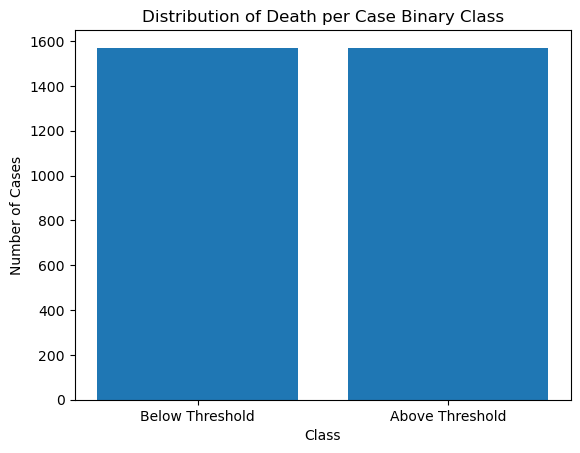

In [148]:
# # Visualizes deaths_per_case class to check for class imbalance.
# plt.bar([0, 1], np.bincount(df_processed['death_per_case']))
# plt.xticks([0, 1], ['No', 'Yes'])
# plt.title("Distribution of Death per Case")
# plt.show()

# Convert 'death_per_case' to binary (assuming 'death_per_case' is not already binary)
# Compute the median value of 'death_per_case'
threshold = df_processed['death_per_case'].median()

# Binarize 'death_per_case' based on the threshold
df_processed['death_per_case_binary'] = (df_processed['death_per_case'] > threshold).astype(int)

class_counts = np.bincount(df_processed['death_per_case_binary'])

# Plot the distribution
plt.bar([0, 1], class_counts)
plt.xticks([0, 1], ['Below Threshold', 'Above Threshold'])
plt.title("Distribution of Death per Case Binary Class")
plt.ylabel('Number of Cases')
plt.xlabel('Class')
plt.show()


In [149]:
# print(df_processed.dtypes)

In [150]:
# Class imbalance solved through SMOTE
from imblearn.over_sampling import SMOTE

# Convert 'Y' to 1 and 'N' to 0 in the 'deaths' column
df_processed['deaths'] = df_processed['deaths'].apply(lambda x: 1 if x == 'Y' else 0)

# Now, split your data into features and target again, ensuring all features are numeric
X = df_processed.loc[:, df_processed.columns != 'death_per_case_binary']
y = df_processed['death_per_case_binary']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print('Before SMOTE:', np.bincount(y_train))
print('After SMOTE:', np.bincount(y_train_res))


Before SMOTE: [1256 1255]
After SMOTE: [1256 1256]


In [151]:
# Returns balanced features and target after using SMOTE resampling to balance the classes.
smote = SMOTE(random_state=123)
features = df_processed.loc[:, df_processed.columns != 'death_per_case_binary']
target = df_processed['death_per_case_binary']
features, target = smote.fit_resample(features, target)

##### MSE to Evaluate our Performance

[3] https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3#:~:text=The%20Mean%20Squared%20Error%20(MSE,out%20across%20the%20whole%20dataset.

The calcuation of MSE is done by taking "the differnce between your model’s predictions and the ground truth, square it, and average it out across the whole dataset." By calculating the MSE value we ensure that our model is free of any outlier prediction that will cause errors. In the output cell below you can see the increase from the training and testing value. This shows that there could be some degree of overfitting. Overfitting can be caused by our model learning the data too well which results in poor performance on unseen data.

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dropping non-relevant columns for regression analysis
# You would also drop 'deaths' if it's not relevant as a binary feature for regression
regression_df = df_processed.drop(['deaths', 'death_per_case_binary'], axis=1)

# Handling any missing values if necessary
regression_df.fillna(regression_df.mean(), inplace=True)

# Now we will split the data into features and target
X = regression_df.drop('deaths_per_1000', axis=1)
y = regression_df['deaths_per_1000']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict on the training data and the test set
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate the mean squared error for the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# If you want to view the coefficients of the regression
coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Training MSE: 0.09327898838551306
Test MSE: 0.1954830708980363
                                                     Coefficient
county_name                                        -6.445779e-06
state                                              -5.597686e-05
confirmed_cases                                    -4.275665e-02
total_pop                                           5.788808e-08
median_income                                      -4.246777e-03
median_age                                          9.812615e-03
cases_per_1000                                      4.594187e-01
death_per_case                                      7.881618e-01
female_pop                                         -4.266533e-07
male_pop                                            4.845368e-07
confirmed_cases_X_deaths                           -3.546419e-06
total_pop_X_median_age_X_cases_per_1000            -3.161689e-01
total_pop_X_median_age_X_deaths_per_1000            3.161672e-01
female_pop_X_male_pop_X_med

##### Visualization of SMOTE Results

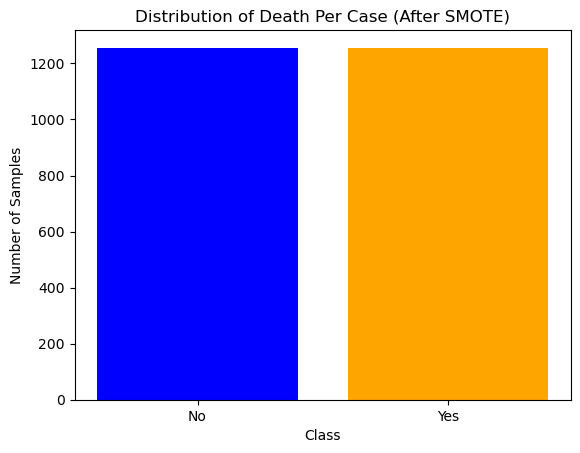

In [153]:
# Assuming y_train_res is the target array after SMOTE
class_distribution = np.bincount(y_train_res)
classes = [0, 1]

# Visualizes balanced death_per_case class after using SMOTE
plt.bar(classes, class_distribution, color=['blue', 'orange'])
plt.xticks(classes, ['No', 'Yes'])
plt.title("Distribution of Death Per Case (After SMOTE)")
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


To ensure that the dataset is totally balanced, we will use SMOTE.  SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used for oversampling the minority class in imbalanced datasets. SMOTE improves the performance of models trained on imbalanced datasets by generating synthetic examples of the minority class and improving its representation in the training data It creates synthetic examples of the minority class by interpolating new examples from the existing minority class examples.

In [154]:
# Returns training and testing data splits for regression (without stratification).
x_train, x_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=123,
)

# Basic Keras Model w/ Stratification

[4] https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3#:~:text=The%20Mean%20Squared%20Error%20(MSE,out%20across%20the%20whole%20dataset.

In the cells below we created a basic logistic regression model using F1-score as the metric.
In creating a basic keras model we can grasp a sense for how our model may perform.

Since our dataframe is relatively small, we used StratifiedKFold for the cross validation component. "In
StratifiedKFold,the dataset is divided into k subsets or folds, where each fold maintains the same
proportion of the different target classes as the original dataset." We also used StratifiedKFold because
it ensures that our training and testing sets in each fold have a similar class distribution thus making the
"evaulation more reliable and accurate."

C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

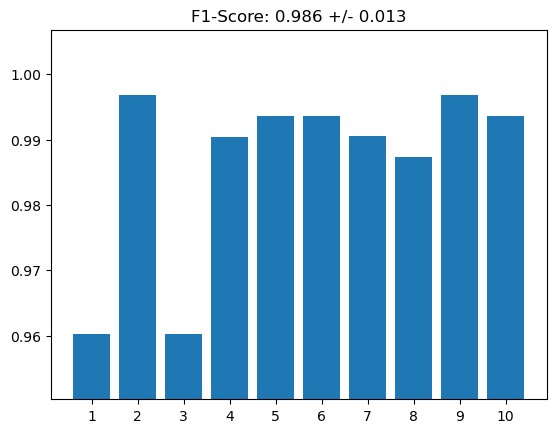

In [42]:
# Creates a basic model using logistic regression using the F1-score
# as the metric. Since the dataset is relatively small, we used
# StratifiedKFold since it performs well under these types of conditions.
# This strategy is appropriate since it relates to a real-world
# situation.

# Selects a model
model = LogisticRegression(penalty="l2", random_state=123)

# Selects cross validation
cross_validation = StratifiedKFold(n_splits=10)

# Determines evaluation criteria
scorer = make_scorer(f1_score)

# Runs model with cross validation
scored_model = cross_val_score(
    estimator=model,
    X=features[continuous_features + categorical_features],
    y=target,
    cv=cross_validation,
    scoring=scorer,
)

# Plots model
plt.bar([str(num + 1) for num in range(len(scored_model))], scored_model)
plt.ylim([min(scored_model) - 0.01, max(scored_model) + 0.01])
plt.title(f"F1-Score: {scored_model.mean():.3f} +/- {scored_model.std():.3f}")
plt.show()

We employ logistic regression with L2 regularization to construct a binary classification model. To assess its performance, we integrate the model with the cross_val_score() function for cross-validation. The chosen cross-validation technique is StratifiedKFold, which strategically divides the dataset into multiple folds while preserving the class distribution of the target variable in each fold. The application of StratifiedKFold as the cross-validation strategy ensures an equitable distribution of the target variable's classes within each of the 10 folds, as indicated by the parameter n_splits=10. This approach is particularly crucial when dealing with imbalanced class distributions in the target variable. By maintaining the original dataset's class imbalance in each fold, the code guards against biased evaluation results that may arise from unequal class representations in different folds. In scenarios where the target variable exhibits imbalanced classes, this stratified approach is vital. It guarantees that the model is assessed on a representative dataset, providing a fair evaluation that mirrors the original class distribution. Stratified k-fold cross-validation involves partitioning the data into 10 folds, training and evaluating the model on each fold. This methodology enhances the robustness of the performance estimate by leveraging each observation for both training and testing. Furthermore, the use of stratified k-fold cross-validation ensures that the model evaluation encompasses a representative sample of each class in the dataset. This consideration is particularly significant in the context of a heart disease dataset, where achieving a balanced assessment across different classes is crucial. In summary, employing stratified k-fold cross-validation on a COVID-19 dataset comprising 3142 rows enhances the reliability of the model's performance estimate. This approach mimics real-world scenarios more accurately, providing a comprehensive evaluation that accounts for imbalanced class distributions and ensures a fair representation of each class in the assessment process.

In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and 'deaths' is the target column.
# Replace with the actual names of your DataFrame and column.

# Convert continuous target into a binary categorical target
target_binary = np.where(df['deaths'] > 0, 1, 0)

# Prepare the feature space
# Assuming all other columns in df are features
features = df.drop('deaths', axis=1)

# Standardize features (Logistic Regression benefits from feature scaling)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Set up the Logistic Regression model
model = LogisticRegression()

# Set up cross-validation configuration
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up the scoring function
f1_scorer = make_scorer(f1_score, average='binary')  # 'binary' is used for binary classification

# Perform cross-validation
cross_val_scores = cross_val_score(model, features_scaled, target_binary, cv=cross_validation, scoring=f1_scorer)

# Print the individual F1 scores
print("F1 Scores for each fold:", cross_val_scores)

# Print the mean F1 score across all folds
print("Average F1 Score:", np.mean(cross_val_scores))

# Optionally, plot the F1 scores for each fold
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores)
plt.xlabel('Fold Number')
plt.ylabel('F1 Score')
plt.title('F1 Scores for each fold')
plt.show()


ValueError: could not convert string to float: 'Los Angeles County'

In [45]:
# Creation of the Keras model visualization function.
def plot_confusion_matrix(
    cm,
    target_names,
    title="Confusion matrix",
    cmap=None,
    normalize=True,
    class_results: dict = {},
):
    """
    Given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    if class_results:
        x_lab = "Predicted label\n\n"
        x_lab += f"accuracy={accuracy:0.4f}\nmisclass={misclass:0.4f}\n"
        for key, value in class_results.items():
            x_lab += f"{key}={value:0.4f}\n"
    else:
        x_lab = "Predicted label\n\n"
        x_lab += f"accuracy={accuracy:0.4f}\nmisclass={misclass:0.4f}\n"

    plt.xlabel(x_lab)
    plt.show()

In [46]:
# Creation of the basic model that will be run on the functions above.

# Defines the training data to be used for constructing the model
x_train_for_model = x_train[categorical_features + continuous_features]
x_test_for_model = x_test[categorical_features + continuous_features]

In [47]:
# Setup the input size
n_features = x_train_for_model.shape[1]
input_tensor = Input(shape=(n_features,))

In [48]:
# Creates dense layers. Dense means a fully connected layer. A layer
# is callable on a tensor.
x = Dense(units=10, activation="relu")(input_tensor)
x = Dense(units=5, activation="tanh")(x)
predictions = Dense(1, activation="sigmoid")(x)

In [49]:
# Creates a model with 1 Input layer and 3 Dense layers
model = Model(inputs=input_tensor, outputs=predictions)

In [50]:
# The model is compiled with an Adam optimizer and mean squared error loss function.
# Compiles the model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall()],
)

In [51]:
# Prints model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The summary of our model below shows that we have a total of 4 layers (1 input layer and 3 dense layers). The term "Output Shape" indicates the shape of the output produced by each layer, and in this case, it shows the number of units in each layer's output. The "Param #" column indicates the number of parameters or learnable weights in each layer. Parameters are the variables that the model learns during training, and they determine the relationships between inputs and outputs. The total number of parameters in this model is 151, and all of them are trainable, as indicated by the "Trainable params" value of 151. The "Non-trainable params" column indicates the number of parameters that are not trainable, which means they are not updated during training. In this case, there are 0 non-trainable parameters. The model is then trained on the training data with a batch size of 50 and 10 epochs.

In [52]:
# Fits model to training data
model.fit(x_train_for_model, y_train, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
51/51 [==============================] - 1s 2ms/step - loss: 0.3906 - recall: 1.0000
Epoch 2/10
51/51 [==============================] - 0s 2ms/step - loss: 0.3545 - recall: 0.9976
Epoch 3/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2516 - recall: 0.9911
Epoch 4/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2497 - recall: 0.9927
Epoch 5/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2489 - recall: 0.9951
Epoch 6/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2485 - recall: 0.3231
Epoch 7/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2527 - recall: 0.0996
Epoch 8/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2474 - recall: 0.0316
Epoch 9/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2469 - recall: 0.0478
Epoch 10/10
51/51 [==============================] - 0s 2ms/step - loss: 0.2452 - recall: 0.1077


In [53]:
y_predict_proba = model.predict(x_test_for_model)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

20/20 [==============================] - 0s 2ms/step


In [54]:
# Prints classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.47      0.99      0.64       293
           1       0.67      0.02      0.03       335

    accuracy                           0.47       628
   macro avg       0.57      0.50      0.34       628
weighted avg       0.57      0.47      0.32       628



In the above report, and in the following confusion matrix, we will use several prediction scores to measure our model's predictions. Accuracy is a measure of the overall correctness of a model's predictions, calculated as the ratio of the number of correct predictions to the total number of predictions. For this run, our initial accuracy score is .5032 or roughly 50% accuracy. While likely not a viable solution for field-use right now (for the purpose of determining death possibility from a positive COVID-19 diagnosis) - we do think that this score is an acceptable baseline value, since death is inherently unpredictable and treatment for the condition of COVID-19 continues to improve as more people become vaccinated, and medical treatment for those who have a positive diagnosis has improved greatly. 

Misclass, or misclassification, refers to the instances where a model's prediction does not match the actual class label of a data point. Misclassification can be measured using various metrics such as accuracy, precision, recall, and F1-score - but in this case we can easily determine misclass by calculating 1.0 minus the accuracy score. The missclass score was .4968 or roughly 50%.  

Precision is a measure of how well a model correctly identifies positive instances among the predicted positive instances. Precision is calculated as the ratio of the number of true positive predictions to the total number of positive predictions (which would be the true positive predictions plus the false positive predictions). In our case, the precision score is .4896 or roughly 50%. This is slightly higher than our accuracy value which we feel is ideal for finding a viable solution for field-use as it is critically important to minimize false positive and maximize true positives. 

Recall, also known as sensitivity or the true positive rate, is a measure of how well a model identifies all the positive instances among the actual positive instances. Recall is calculated as the ratio of the number of true positive predictions to the total number of actual positive instances (i.e., sum of true positive and false negative predictions). Our recall score for this run was .5032 or roughly 50%. 

F1-score is the "harmonic mean" of precision and recall, providing a single value that balances the trade-off between precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall). Our F1-score for this run was .4808 or roughly 50%. 

Support refers to the number of occurrences of each class in the actual dataset. In the context of classification evaluation metrics, support is often used as a weighting factor to calculate our other metrics, taking into account the imbalanced distribution of classes in the dataset. Our support score for this run was 628. 

In our graphed confusion matrix, we are particularly interested in the bottom left square - which represents a predicted "No Death" but the true value is "Death".

We feel that this false negative is the most important value in the confusion matrix due to the danger of missing a true case of death in a person diagnosed with COVID-19 - where the person would have had a previous illness before being diagnosed with COVID-19 resulting in extreme health complications or even death that could be avoided with a positive prediction.

The false negative value is 101 for this run - meaning that 43% people who have a positive COVID-19 diagnosis may be mispredicted as having no COVID-19 as the cause of death by our model. While the other metrics and squares appear acceptable, we feel that this false negative score not a viable solution.

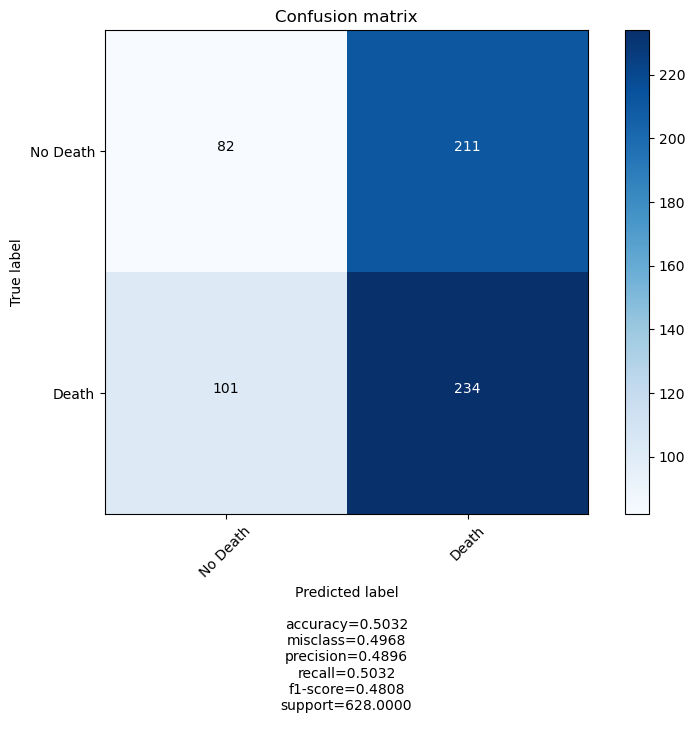

In [156]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results = class_report['weighted avg']
)

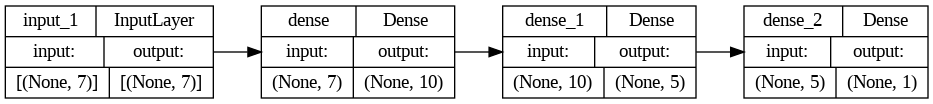

In [52]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

# Wide and Deep Network #1

Our first model uses 5 branches with 50, 30, 20, 10, and 5 units respectively. Each of the branches use a relu activaition function. Our first model also uses two of the crossed columnsfrom feature crossing. More specifically the first model uses the feature cross on confirmed cases and deaths an it also crosses on total population, median age and cases per 1000. Lastly this model adds one layer to the last branch with a sigmoid activation function.

In [56]:
# Wide and Deep Network #1

# Step 1: Define data that will be used. Data is converted into numpy format.

# x training data for model
mod_x_train_cross = x_train[x_col_features[:2]].to_numpy()
mod_x_train_categorical = x_train[categorical_features].to_numpy()
mod_x_train_continuous = x_train[continuous_features].to_numpy()

# x testing data for model
mod_x_test_cross = x_test[x_col_features[:2]].to_numpy()
mod_x_test_categorical = x_test[categorical_features].to_numpy()
mod_x_test_continuous = x_test[continuous_features].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = (
    [mod_x_train_cross] + [mod_x_train_categorical] + [mod_x_train_continuous]
)
mod_x_test = (
    [mod_x_test_cross] + [mod_x_test_categorical] + [mod_x_test_continuous]
)

In [57]:
# Step 2: Define the inputs that will be used
input_cross = Input(
    shape=(mod_x_train_cross.shape[1],), dtype="int64", name="inputs_wide"
)
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)

In [58]:
# Step 3: Define placeholder variables for data input

# Defines outputs
output_cross = []
output_categorical = []
output_continuous = []

# Defines branches
branch_wide = []
branch_deep = []
branch_final = []

In [59]:
# Step 4: Add embeddings for crossed data

# For cross data embeddings...
tmp_train = mod_x_train_cross.T.tolist()
tmp_test = mod_x_test_cross.T.tolist()
tmp_colnames = x_col_features[: mod_x_train_cross.shape[1]]

# Iterates through cross variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_cross, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_cross.append(embedding)

In [60]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [61]:
# Step 6: Add layers to wide branch
wide = []
for embedding in output_cross + output_categorical:
    wide.append(embedding)
branch_wide = keras.layers.concatenate(wide, name="wide_concat")

In [62]:
# Step 7: Add layer for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)

In [63]:
# Step 8: Add dense layer to deep branch
branch_deep.append(x_dense)

In [64]:
# Step 9: Merge the deep branch layers
branch_deep = keras.layers.concatenate(branch_deep, name="deep_concat")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=30, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=20, activation="relu", name="deep3")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep4")(branch_deep)
branch_deep = Dense(units=5, activation="relu", name="deep5")(branch_deep)

In [65]:
# Step 10: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [66]:
# Step 11: Add dense layer to final branch
branch_final = Dense(units=1, activation="sigmoid", name="combined")(
    branch_final
)

In [67]:
# Step 12: Build model
model = Model(
    inputs=[input_cross, input_categorical, input_continuous],
    outputs=branch_final,
)

In [68]:
# Step 13: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [69]:
# Prints the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_numeric (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                                
                                                                                                  
 num_1 (Dense)               (None, 20)                   120       ['inputs_numeric[0][0]']      
                                                                                                  
 deep_concat (Concatenate)   (None, 20)                   0         ['num_1[0][0]']               
                                                                                                  
 deep1 (Dense)               (None, 50)                   1050      ['deep_concat[0][0]']   

In [70]:
# Step 14: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 10ms/step - loss: 0.2450 - recall_1: 0.5344 - auc: 0.6209 - val_loss: 0.2312 - val_recall_1: 0.7403 - val_auc: 0.7549
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1888 - recall_1: 0.7992 - auc: 0.8832 - val_loss: 0.1865 - val_recall_1: 0.8836 - val_auc: 0.7840
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1432 - recall_1: 0.8559 - auc: 0.9299 - val_loss: 0.1833 - val_recall_1: 0.5821 - val_auc: 0.7974
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0936 - recall_1: 0.9684 - auc: 0.9969 - val_loss: 0.1791 - val_recall_1: 0.6418 - val_auc: 0.8014
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0514 - recall_1: 0.9968 - auc: 0.9992 - val_loss: 0.1768 - val_recall_1: 0.7582 - val_auc: 0.8019
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0274 - recall_1: 0.9992 - auc: 0.9994 - val_loss: 0.1773 - val_re

Epoch 48/50
51/51 [==============================] - 0s 4ms/step - loss: 9.6644e-05 - recall_1: 1.0000 - auc: 1.0000 - val_loss: 0.1870 - val_recall_1: 0.6925 - val_auc: 0.7886
Epoch 49/50
51/51 [==============================] - 0s 5ms/step - loss: 9.1911e-05 - recall_1: 1.0000 - auc: 1.0000 - val_loss: 0.1871 - val_recall_1: 0.6925 - val_auc: 0.7884
Epoch 50/50
51/51 [==============================] - 0s 5ms/step - loss: 8.7462e-05 - recall_1: 1.0000 - auc: 1.0000 - val_loss: 0.1873 - val_recall_1: 0.6925 - val_auc: 0.7883


## Wide and Deep Network #1 Visualization
[5] https://www.statology.org/sklearn-classification-report/

In the first cell below you can see the classifcation report of our model. The first value, precision, represents the percent of "correct positive predictions relative to total positive predictions." The second value, Recall, represents the "percentage of correct positive predictions relative to total actual positives." The third value, f1-score represents a "weighted harmonic mean of precision and recall. The closer to 1, the better the model. "

From the values we are able to determine our first wide and deep network did better than average. This means our model was able to positvely predict over half of the testing set. Since our F1 score reached a harmonic mean of about 70 this further supports that our model performed above average!

In the cells below you will see six visualiztion that display the values discussed above and the the representation of our models AUC and ROC curves. Each visualization represents the performace of our first wide and deep network.

In [71]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       293
           1       0.73      0.69      0.71       335

    accuracy                           0.70       628
   macro avg       0.70      0.70      0.70       628
weighted avg       0.70      0.70      0.70       628



For this run, our accuracy score increases to .6975 or roughly 70% accuracy, which is a much more viable solution for field-use compared to the previous value of 50%.

The missclass score decreased from roughly 50% to .3025 or roughly 30%.

In this case, the precision score increased from .4896 or roughly 50% to .6990 or 70%. 

Our recall score for this run increased from .5032 or roughly 50% to .6975 or about 70%.

The F1-score for this run increased from .4808 or roughly 50% to .6978 or about 70%.

Our support score for this run remained at 628.

Overall, the metrics for the proposed model all saw an improvement, but the scores are not substantial to determine the validity of the model in actual field work.  More exploration must take place in order to ensure that the model is accurately predicting the death rate of people who get diagnosed with COVID-19 so that a real-world scenario can be properly supported by our model.

Furthermore, in our graphed confusion matrix, we are particularly interested in the bottom left square - which represents a predicted "No Death" but the true value is "Death".

We feel that this false negative is still the most important value in the confusion matrix due to the danger of missing a true case of death in a person diagnosed with COVID-19 - where the person would have had a previous illness before being diagnosed with COVID-19 resulting in extreme health complications or even death that could be avoided with a positive prediction. While the other metrics and squares appear acceptable, we feel that this false negative score is not a viable solution.

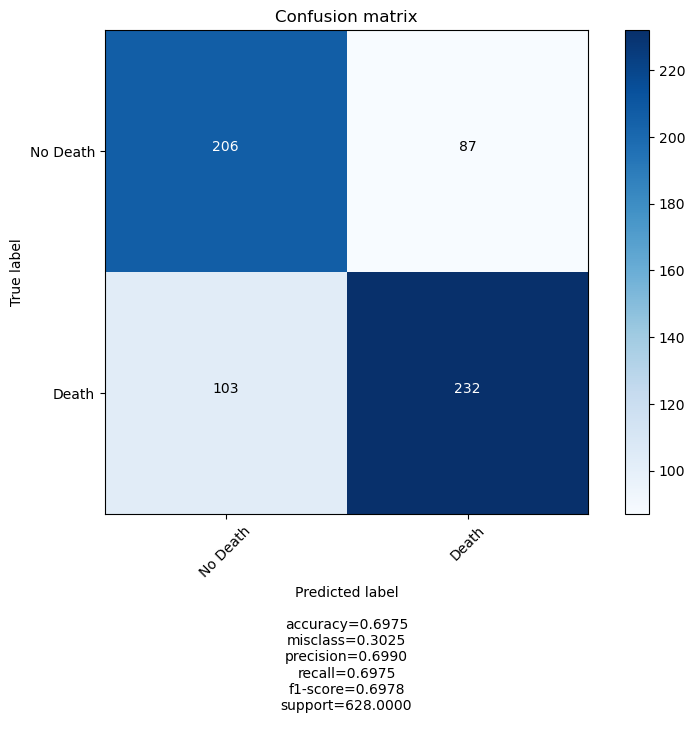

In [72]:
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

### Loss vs. Epochs Graph

The visualization below shows our models progress during training. The points on the line correspond to the values
recorded in each epoch. In a loss vs. epoch graph the lower the value the better because the lower the value means the less time it took our model to train.

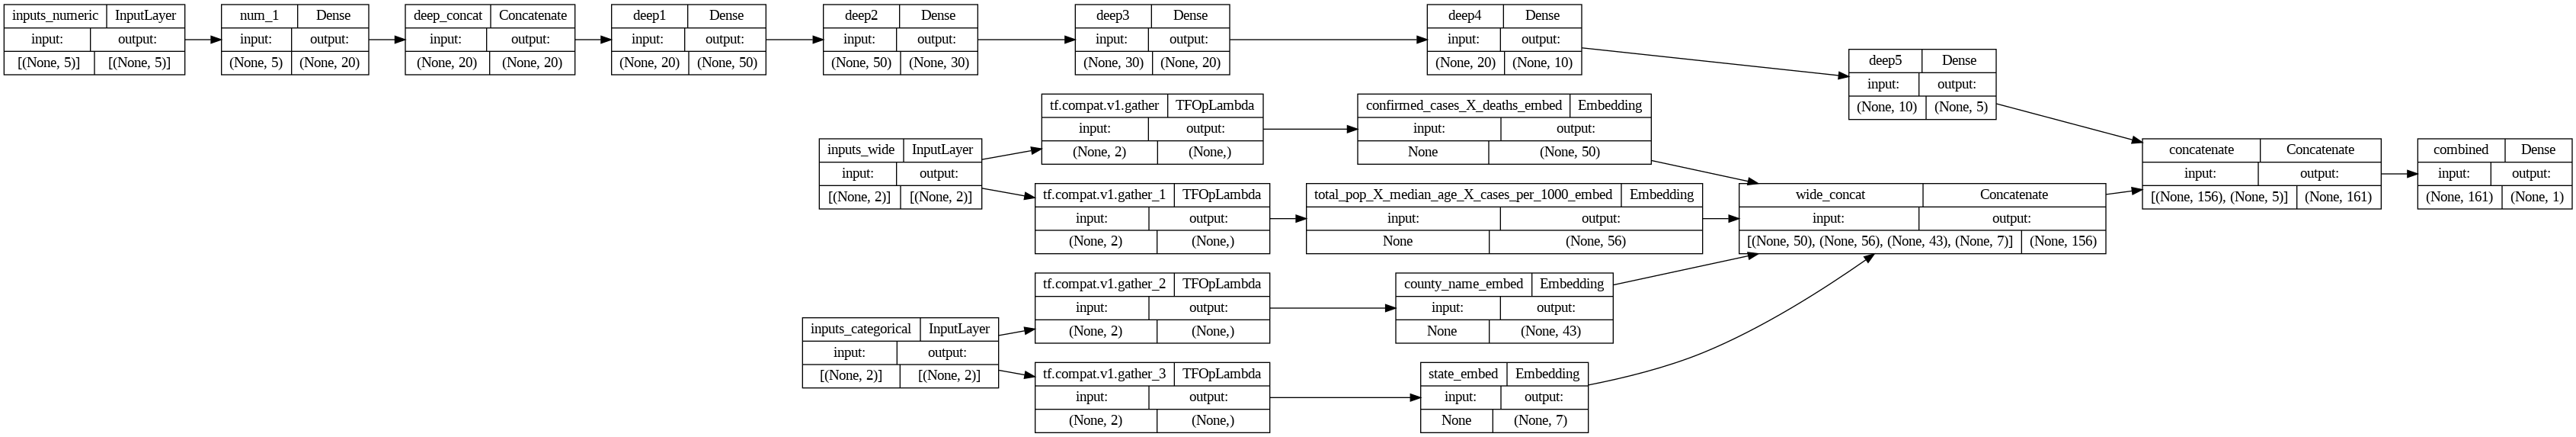

In [70]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

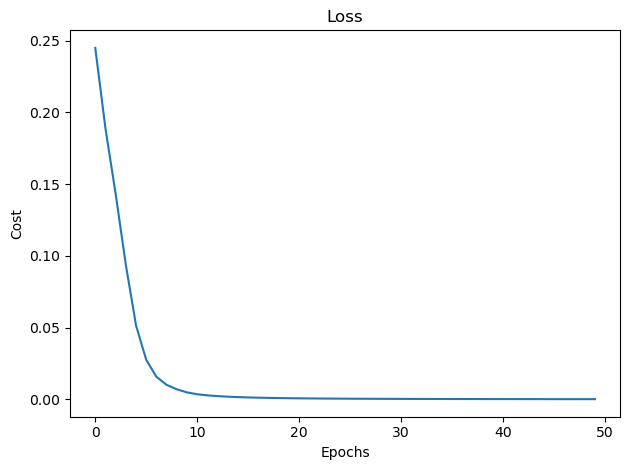

In [73]:
# Variables for determining the loss over epochs
epochs = model_history.epoch
loss = model_history.history["loss"]

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

### AUC/ROC Visualization
[6] https://www.evidentlyai.com/classification-metrics/explain-roc-curve#:~:text=ROC%20AUC%20score%20shows%20how,have%20an%20AUC%20of%200.5.

A AUC/ROC curve is a "performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. " This measure of separability assists us in distinguishing between classes. The higher the AUC value the better at classification the model is. For example the closer our value is to 1 the more likely we are able to correclty classify positive COVID19 cases. Further a perfect AUC curve hugs the y axis and is consistently above the random model (red dashed line). In our visualization below you can see our model is above the red dashed line but does not exactly hug the y axis. This means our model performed okay.

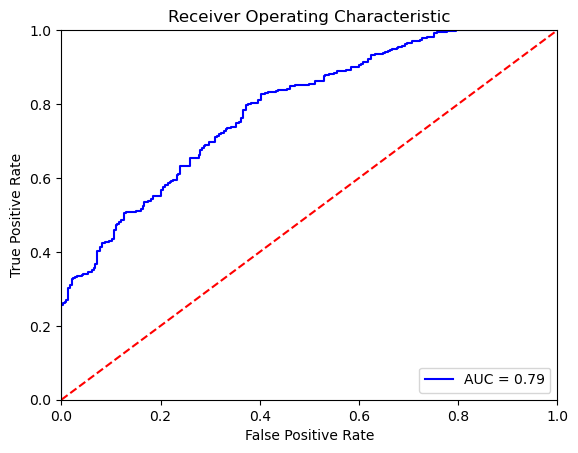

In [74]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Visualization of the Training Data and Validation Data (using Keras History)

Below you can see three visualizations. The first being the epoch vs loss graph with both the training and validation data. Here you can see our training model learning over time compared to out validation data consistantly producing a loss value of 0.2. As we discussed above the lower the epoch vs. loss ratio the better the model performed. Therefore our model performed relatively well in its predictions.

The next graph is a visual representation of the recall vs. epochs for our training and validation data. The blue line represents the training data and it shows consistent growth over time. Thus meaning the training data is able to correctly identify positive COVID19 cases as training progresses. The orange line represents the validation data and it shows a fluctuation in the line and then it flat lines. This can mean that our model is either struggling to generalize or it is overfitting the training data.

The last graph is a visual representation of the AUC curve for our training and validation data. As you can see the blue line (training data) hugs the y axis and consistently grows closer to one. This means our training data was able to correctly classify COVID19 positive cases. The orange line in the graph represents the validation data. As you can see it increases slightly and then flatlines. This could be because our model may have already converged and reached its optimal performance or that there architectural improvements that could be made to our model. This means that any further training will not result in a significant improvement of performance.

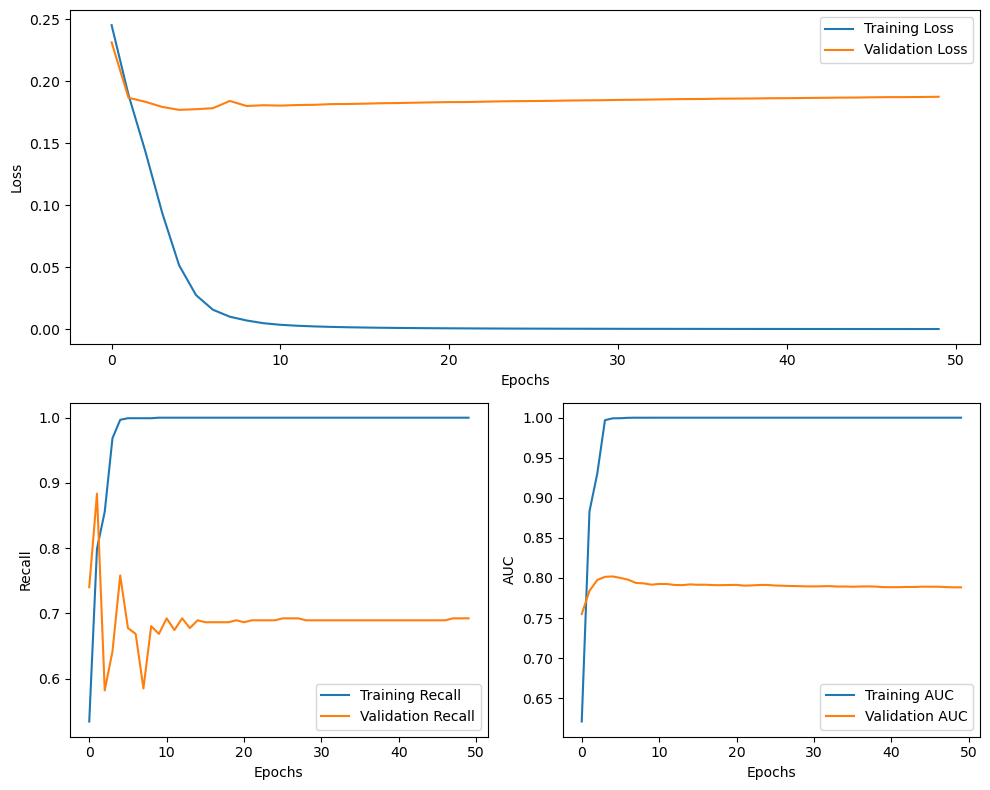

In [75]:
# Model history values
hist_values = list(model_history.history.values())

# Variables for plotting the training versus testing
train_loss   = hist_values[0]
train_recall = hist_values[1]
train_auc    = hist_values[2]
val_loss     = hist_values[3]
val_recall   = hist_values[4]
val_auc      = hist_values[5]

# Plots the training versus testing graph
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, (1, 2))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label="Training Recall")
plt.plot(val_recall, label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_auc, label="Training AUC")
plt.plot(val_auc, label="Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()

plt.show()

# Wide and Deep Network #2

Our second model uses 3 branches with 50, 30, 20, 10, and 5 units respectively.

Each of the branches use a relu activaition function. Our second model also uses three of the crossed columns from feature crossing. More specifically the second model uses the feature cross on confirmed cases and deaths, a separate cross on total population, median age and cases per 1000, and a third feature cross on 3 the total population, median age and deaths per 1000.

Lastly this model adds one layer to the last branch with a sigmoid activation function.

In [76]:
# Wide and Deep Network #2

# Step 1: Define data that will be used. Data is converted into numpy format.

# x training data for model
mod_x_train_cross = x_train[x_col_features[:3]].to_numpy()
mod_x_train_categorical = x_train[categorical_features].to_numpy()
mod_x_train_continuous = x_train[continuous_features].to_numpy()

# x testing data for model
mod_x_test_cross = x_test[x_col_features[:3]].to_numpy()
mod_x_test_categorical = x_test[categorical_features].to_numpy()
mod_x_test_continuous = x_test[continuous_features].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = (
    [mod_x_train_cross] + [mod_x_train_categorical] + [mod_x_train_continuous]
)
mod_x_test = (
    [mod_x_test_cross] + [mod_x_test_categorical] + [mod_x_test_continuous]
)

In [77]:
# Step 2: Define the inputs that will be used
input_cross = Input(
    shape=(mod_x_train_cross.shape[1],), dtype="int64", name="inputs_wide"
)
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)

In [78]:
# Step 3: Define placeholder variables for data input

# Defines outputs
output_cross = []
output_categorical = []
output_continuous = []

# Defines branches
branch_wide = []
branch_deep = []
branch_final = []

In [79]:
# Step 4: Add embeddings for crossed data

# For cross data embeddings...
tmp_train = mod_x_train_cross.T.tolist()
tmp_test = mod_x_test_cross.T.tolist()
tmp_colnames = x_col_features[: mod_x_train_cross.shape[1]]

# Iterates through cross variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_cross, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_cross.append(embedding)

In [80]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [81]:
# Step 6: Add embeddings to wide branch
wide = []
for embedding in output_cross + output_categorical:
    wide.append(embedding)
branch_wide = keras.layers.concatenate(wide, name="wide_concat")

In [82]:
# Step 7: Add branch for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)
x_dense = Dense(units=10, activation="relu", name="num_2")(x_dense)
x_dense = Dense(units=5, activation="relu", name="num_3")(x_dense)

In [83]:
# Step 8: Add dense layer to deep branch
branch_deep.append(x_dense)

In [84]:
# Step 9: Merge the deep branches
branch_deep = keras.layers.concatenate(branch_deep, name="deep_concat")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=25, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep3")(branch_deep)

In [85]:
# Step 10: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [86]:
# Step 10: Add dense layer to final branch
branch_final = Dense(units=1, activation="sigmoid", name="combined")(
    branch_final
)

In [87]:
# Step 11: Build model
model = Model(
    inputs=[input_cross, input_categorical, input_continuous],
    outputs=branch_final,
)

In [88]:
# Step 12: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [89]:
# Prints the model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_numeric (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                                
                                                                                                  
 num_1 (Dense)               (None, 20)                   120       ['inputs_numeric[0][0]']      
                                                                                                  
 num_2 (Dense)               (None, 10)                   210       ['num_1[0][0]']               
                                                                                                  
 num_3 (Dense)               (None, 5)                    55        ['num_2[0][0]']         

In [90]:
# Step 13: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 10ms/step - loss: 0.2457 - recall_2: 0.4486 - auc_1: 0.5973 - val_loss: 0.2376 - val_recall_2: 0.2149 - val_auc_1: 0.7590
Epoch 2/50
51/51 [==============================] - 0s 5ms/step - loss: 0.2036 - recall_2: 0.6891 - auc_1: 0.8849 - val_loss: 0.2141 - val_recall_2: 0.6657 - val_auc_1: 0.7834
Epoch 3/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1438 - recall_2: 0.8972 - auc_1: 0.9657 - val_loss: 0.1964 - val_recall_2: 0.7642 - val_auc_1: 0.8125
Epoch 4/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0763 - recall_2: 0.9879 - auc_1: 0.9986 - val_loss: 0.1851 - val_recall_2: 0.7254 - val_auc_1: 0.8140
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0336 - recall_2: 0.9992 - auc_1: 0.9993 - val_loss: 0.1803 - val_recall_2: 0.7104 - val_auc_1: 0.8118
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0159 - recall_2: 0.9992 - auc_1: 0.9999 - val

51/51 [==============================] - 0s 6ms/step - loss: 7.6962e-05 - recall_2: 1.0000 - auc_1: 1.0000 - val_loss: 0.1823 - val_recall_2: 0.6955 - val_auc_1: 0.7954
Epoch 47/50
51/51 [==============================] - 0s 5ms/step - loss: 7.3083e-05 - recall_2: 1.0000 - auc_1: 1.0000 - val_loss: 0.1825 - val_recall_2: 0.6925 - val_auc_1: 0.7948
Epoch 48/50
51/51 [==============================] - 0s 6ms/step - loss: 6.9512e-05 - recall_2: 1.0000 - auc_1: 1.0000 - val_loss: 0.1826 - val_recall_2: 0.6955 - val_auc_1: 0.7948
Epoch 49/50
51/51 [==============================] - 0s 5ms/step - loss: 6.6161e-05 - recall_2: 1.0000 - auc_1: 1.0000 - val_loss: 0.1826 - val_recall_2: 0.6955 - val_auc_1: 0.7946
Epoch 50/50
51/51 [==============================] - 0s 5ms/step - loss: 6.3027e-05 - recall_2: 1.0000 - auc_1: 1.0000 - val_loss: 0.1827 - val_recall_2: 0.6925 - val_auc_1: 0.7941


## Wide and Deep Network #2 Visualization

Similar to the previous model in the first cell below you can see the classification report of our model. The first value, precision, represents the percent of "correct positive predictions relative to total positive predictions." The second value, Recall, represents the "percentage of correct positive predictions relative to total actual positives." The third value, f1-score represents a "weighted harmonic mean of precision and recall. The closer to 1, the better the model. "

From the values we are able to determine our second wide and deep network did better than the first model. The second model was able to positively predict 70% of our testing set. Since our F1 score reached a harmonic mean of about 70-72 this further supports that our second model did better than our first!

In the cells below you will see six visualization that display the values discussed above and the the representation of our models AUC and ROC curves. Each visualization represents the performace of our second wide and deep network.

In [91]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       293
           1       0.74      0.69      0.72       335

    accuracy                           0.71       628
   macro avg       0.71      0.71      0.71       628
weighted avg       0.71      0.71      0.71       628



For this run, our accuracy score increases from .6975 or roughly 70% accuracy, to .7070 or 71% accuracy.

The missclass score decreased from .3025 or roughly 30%, to .2930 or 29%.

In this case, the precision score increased from .6990 or 70%, to .7094 or 71%.

Our recall score for this run increased from .6975 or about 70%, to .7070 or 71%.

The F1-score for this run increased from .6978 or about 70%, to .7073 or 71%.

Our support score for this run remained at 628.

Overall, the metrics for the proposed model all saw an improvement, and the scores are slowly becoming more substantial to determine the validity of the model in actual field work. However, more data exploration must still take place in order to ensure that the model is accurately predicting the death rate of people who get diagnosed with COVID-19 so that a real-world scenario can be properly supported by our model.

Furthermore, the confusion matrix remains the same, and While the other metrics and squares appear acceptable, we feel that this false negative score is still not a viable solution.

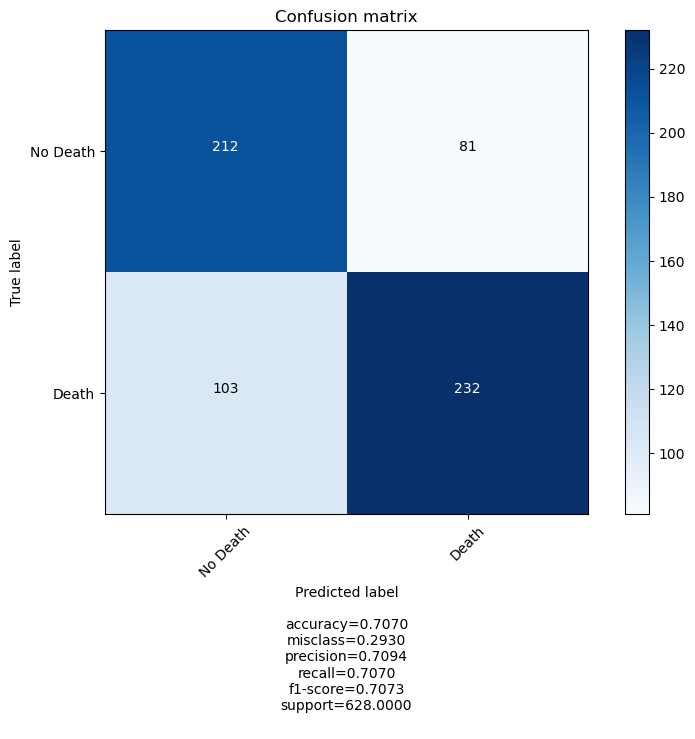

In [92]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

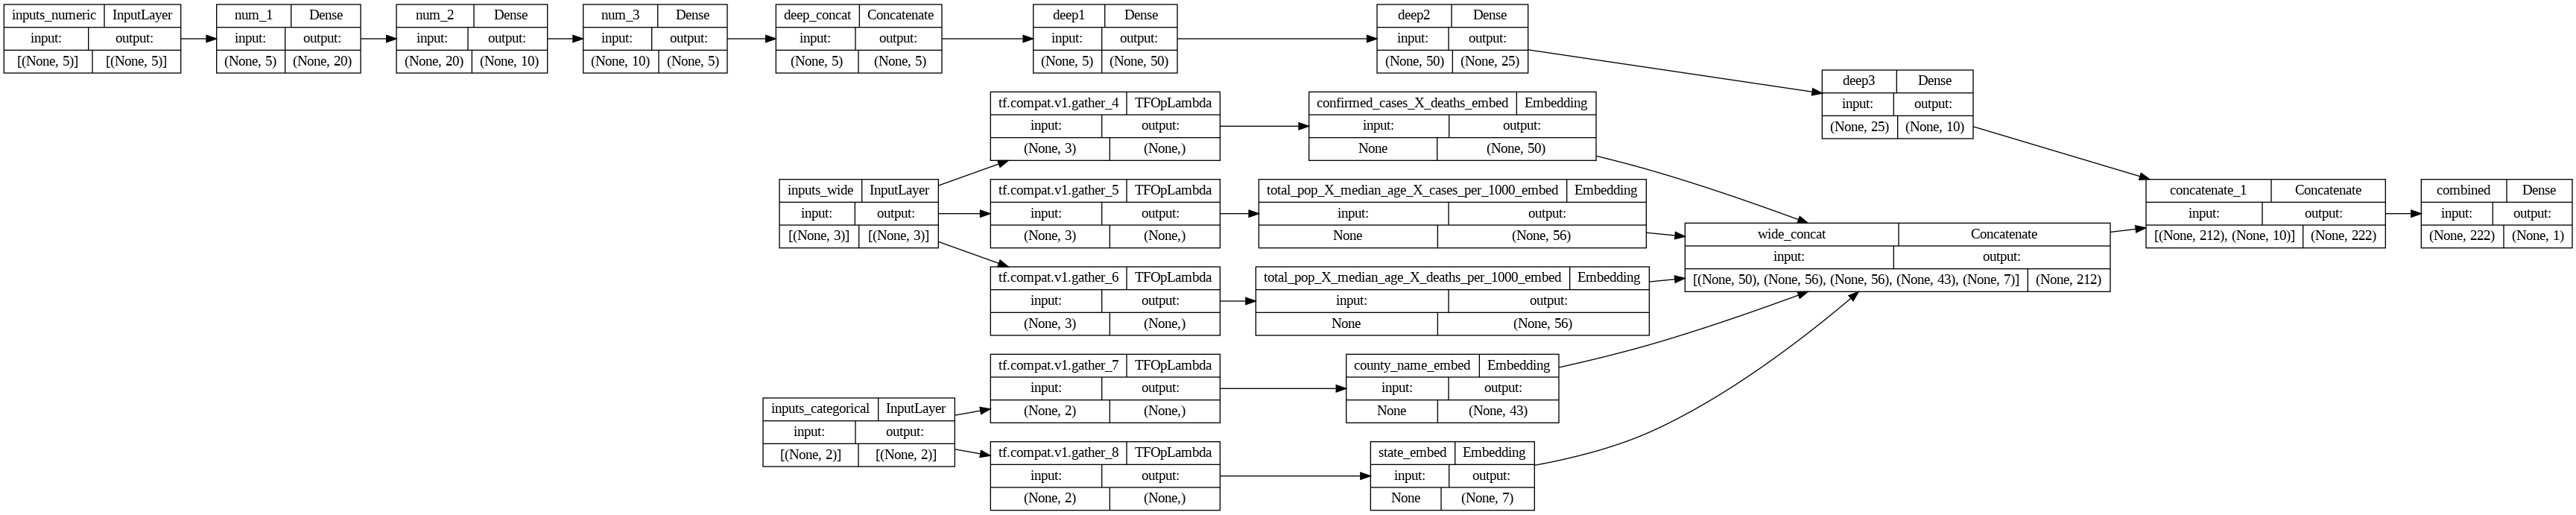

In [91]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

### Loss vs. Epochs Graph

The visualization below shows our models progress during training. The points on the line correspond to the values recorded in each epoch. In a loss vs. epoch graph the lower the cost value the better because the lower the value means the less time it took our model to train. In the visualization, you can see that it took our model a little less than 10 epochs to reach the elbow point or turning point in training.

Compared to our first model you can see the second has a slightly faster slope downwards. This change further supports that our second model did better than our first.

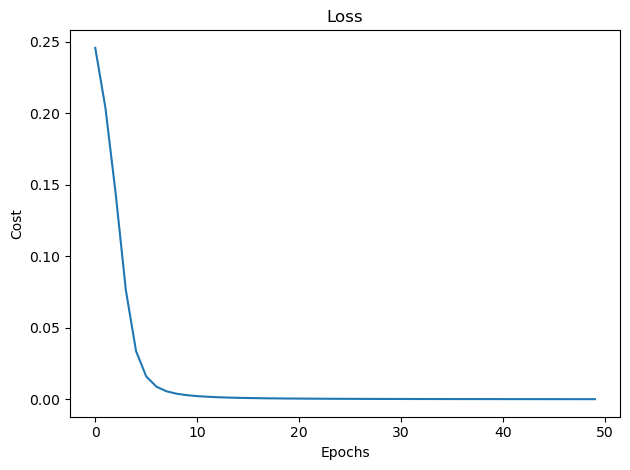

In [93]:
# Variables for determining the loss over epochs
epochs = model_history.epoch
loss = model_history.history["loss"]

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

### AUC/ROC Visualization
https://www.evidentlyai.com/classification-metrics/explain-roc-curve#:~:text=ROC%20AUC%20score%20shows%20how,have%20an%20AUC%20of%200.5.

A AUC/ROC curve is a "performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. " This measure of separability assists us in distinguishing between classes. The higher the AUC value the better at classification the model is. For example, the closer our value is to 1 the more likely we are able to correclty classify positive COVID19 cases.

Further, a perfect AUC curve hugs the y-axis and is consistently above the random model (red dashed line). In our visualization below you can see our model is above the red dashed line and curves towards to y-axis. Unlike the first model this visualization shows a higher arch towards a true positive rate of one. This further represents how our second model performed better than our first.

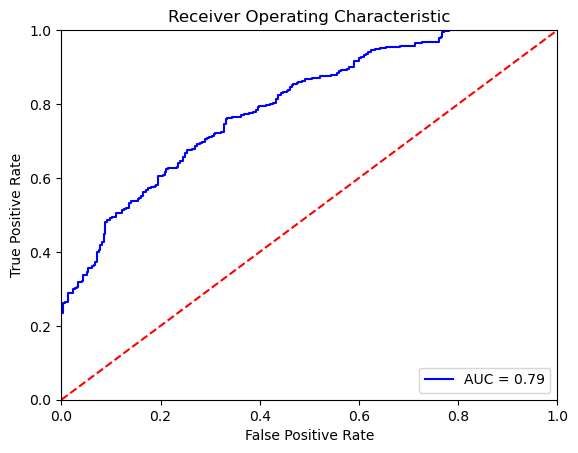

In [94]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Visualization of the Training Data and Validation Data (using Keras History)

Below you can see three visualizations. The first being the epoch vs loss graph with both the training and validation data. Here you can see our training model learning over time compared to out validation data consistantly producing a loss value of 0.17. As we discussed above the lower the epoch vs. loss ratio the better the model performed. Therefore our model performed relatively well in its predictions. In comparison to the first model our second model produced a lower loss value futher proving the second model did better than the first.

The next graph is a visual representation of the recall vs. epochs for our training and validation data. The blue line represents the training data and it shows consistent growth over time. Thus meaning the training data is able to correctly identify positive COVID19 cases as training progresses. The orange line represents the validation data and it shows a more fluctuation than model one and eventually flatlines. The testing data shows more up and down over epochs most likely because our model is struggling to generalize the training data.


The last graph is a visual representation of the AUC curve for our training and validation data. As you can see the blue line (training data) hugs the y axis and consistently grows closer to one. This means our training data was able to correctly classify COVID19 positive cases. When comparing the first models AUC vs epochs graph to the second model you can see a slight increase in slope from the first to the second training AUC. This shows our second model was able to learn faster. The orange line in the graph represents the validation data. As you can see it increases slightly, decreases, and then flatlines. This could be because our model may have converged and reached its optimal performance or there are architectural improvements that could be made to our model such as changing the amount of layers or branches.

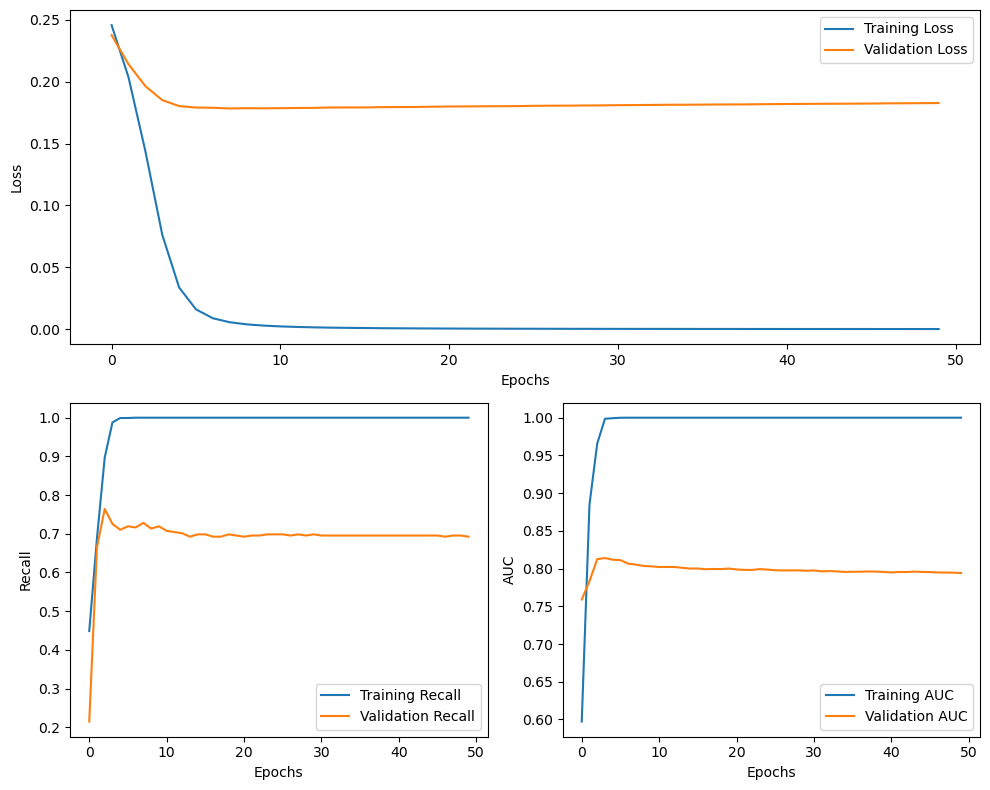

In [95]:
# Variables for plotting the training versus testing
train_loss = list(model_history.history.values())[0]
train_recall = list(model_history.history.values())[1]
train_auc = list(model_history.history.values())[2]
val_loss = list(model_history.history.values())[3]
val_recall = list(model_history.history.values())[4]
val_auc = list(model_history.history.values())[5]

# Plots the training versus testing graph
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, (1, 2))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label="Training Recall")
plt.plot(val_recall, label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_auc, label="Training AUC")
plt.plot(val_auc, label="Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()

plt.show()

# Wide and Deep Network #3

For this network, we will add the stacked cross column to the categorical features to for making the layer wide.

In [157]:
# Wide and Deep Network #3

# Step 1: Define data that will be used. Data is converted into numpy format.

# For this network, we will add the stacked cross column to the categorical
# features to for making the layer wide.

# x training data for model
mod_x_train_categorical = x_train[
    categorical_features + [x_col_features[3]]
].to_numpy()
mod_x_train_continuous = x_train[continuous_features].to_numpy()

# x testing data for model
mod_x_test_categorical = x_test[
    categorical_features + [x_col_features[3]]
].to_numpy()
mod_x_test_continuous = x_test[continuous_features].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = [mod_x_train_categorical] + [mod_x_train_continuous]
mod_x_test = [mod_x_test_categorical] + [mod_x_test_continuous]

In [158]:
# Step 2: Define the inputs that will be used
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)

In [159]:
# Step 3: Defines placeholder variables for data input

# Defines outputs
output_categorical = []
output_continuous  = []

# Defines branches
branch_wide  = []
branch_deep  = []
branch_final = []

In [160]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [161]:
# Step 6: Add dense layers to categorical input
cat_dense = Dense(units=25, activation="relu", name="cat_1")(input_categorical)

In [162]:
# Step 7: Add embeddings to wide placeholder
wide = []
wide.append(cat_dense)
for embedding in output_categorical:
    wide.append(embedding)

In [163]:
# Step 8: Add dense layers to wide branch
branch_wide = keras.layers.concatenate(wide, name="wide_concat")
branch_wide = Dense(units=25, activation="relu", name="wide1")(branch_wide)

In [164]:
# Step 9: Add branch for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)
x_dense = Dense(units=10, activation="relu", name="num_2")(x_dense)
x_dense = Dense(units=5, activation="relu", name="num_3")(x_dense)

In [165]:
# Step 10: Add dense layer to deep branch
branch_deep.append(x_dense)

In [166]:
# Step 11: Merge the deep branches
branch_deep = keras.layers.concatenate(branch_deep, name="deep_concat")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=25, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep3")(branch_deep)

In [167]:
# Step 12: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [168]:
# Step 13: Add dense layer to final branch
branch_final = Dense(units=1, activation="sigmoid", name="combined")(
    branch_final
)

In [169]:
# Step 14: Build model
model = Model(
    inputs=[input_categorical, input_continuous],
    outputs=branch_final,
)

In [170]:
# Step 15: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [171]:
# Prints the model summary
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_numeric (InputLayer  [(None, 5)]                  0         []                            
 )                                                                                                
                                                                                                  
 num_1 (Dense)               (None, 20)                   120       ['inputs_numeric[0][0]']      
                                                                                                  
 num_2 (Dense)               (None, 10)                   210       ['num_1[0][0]']               
                                                                                                  
 inputs_categorical (InputL  [(None, 4)]                  0         []                      

In [172]:
# Step 16: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 8ms/step - loss: 0.4970 - recall_5: 0.7206 - auc_4: 0.5034 - val_loss: 0.4758 - val_recall_5: 0.9313 - val_auc_4: 0.5015
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.5065 - recall_5: 0.9449 - auc_4: 0.5012 - val_loss: 0.4758 - val_recall_5: 0.9284 - val_auc_4: 0.4982
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.5018 - recall_5: 0.8802 - auc_4: 0.5029 - val_loss: 0.4798 - val_recall_5: 0.7910 - val_auc_4: 0.4990
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4856 - recall_5: 0.5595 - auc_4: 0.5087 - val_loss: 0.4886 - val_recall_5: 0.4119 - val_auc_4: 0.5090
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4861 - recall_5: 0.5304 - auc_4: 0.5077 - val_loss: 0.4784 - val_recall_5: 0.8060 - val_auc_4: 0.4998
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.5032 - recall_5: 0.8907 - auc_4: 0.5001 - val_

Epoch 46/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_5: 0.0000e+00 - auc_4: 0.5000 - val_loss: 0.5334 - val_recall_5: 0.0000e+00 - val_auc_4: 0.5000
Epoch 47/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_5: 0.0000e+00 - auc_4: 0.5000 - val_loss: 0.5334 - val_recall_5: 0.0000e+00 - val_auc_4: 0.5000
Epoch 48/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_5: 0.0000e+00 - auc_4: 0.5000 - val_loss: 0.5334 - val_recall_5: 0.0000e+00 - val_auc_4: 0.5000
Epoch 49/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_5: 0.0000e+00 - auc_4: 0.5000 - val_loss: 0.5334 - val_recall_5: 0.0000e+00 - val_auc_4: 0.5000
Epoch 50/50
51/51 [==============================] - 0s 4ms/step - loss: 0.4916 - recall_5: 0.0000e+00 - auc_4: 0.5000 - val_loss: 0.5334 - val_recall_5: 0.0000e+00 - val_auc_4: 0.5000


## Wide and Deep Network #3 Visualization

In [173]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       293
           1       0.00      0.00      0.00       335

    accuracy                           0.47       628
   macro avg       0.23      0.50      0.32       628
weighted avg       0.22      0.47      0.30       628



C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For this run, our accuracy score decreases to .4666 or about 47% accuracy.

The missclass score increases from to .5334 or 53%.

In this case, the precision score decreased to .2177 or 22%.

Our recall score for this run decreased to .4666 or 47%.

The F1-score for this run decreased to .2969 or 30%.

Our support score for this run remained at 628.

Overall, the metrics for the proposed model all saw a drastic decrease, and the scores are nowhere near substantial to determine the validity of the model in actual field work. 

Furthermore, we do notice that both the false negative and true negative scores increased - which may indicate that the model is overfitting. The increase in false negative values could also be due to the complexity of the combined wide and deep architecture, which might result in some misclassifications in certain cases.

C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


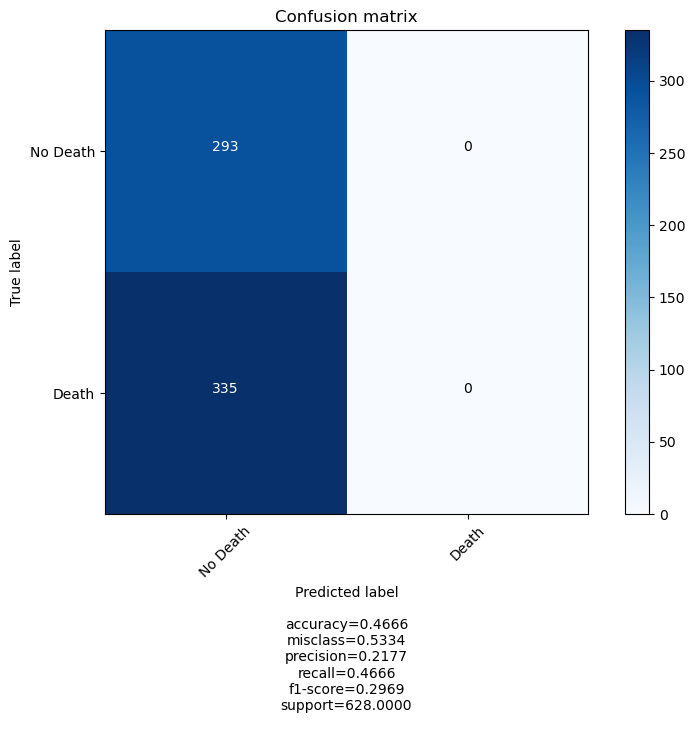

In [174]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

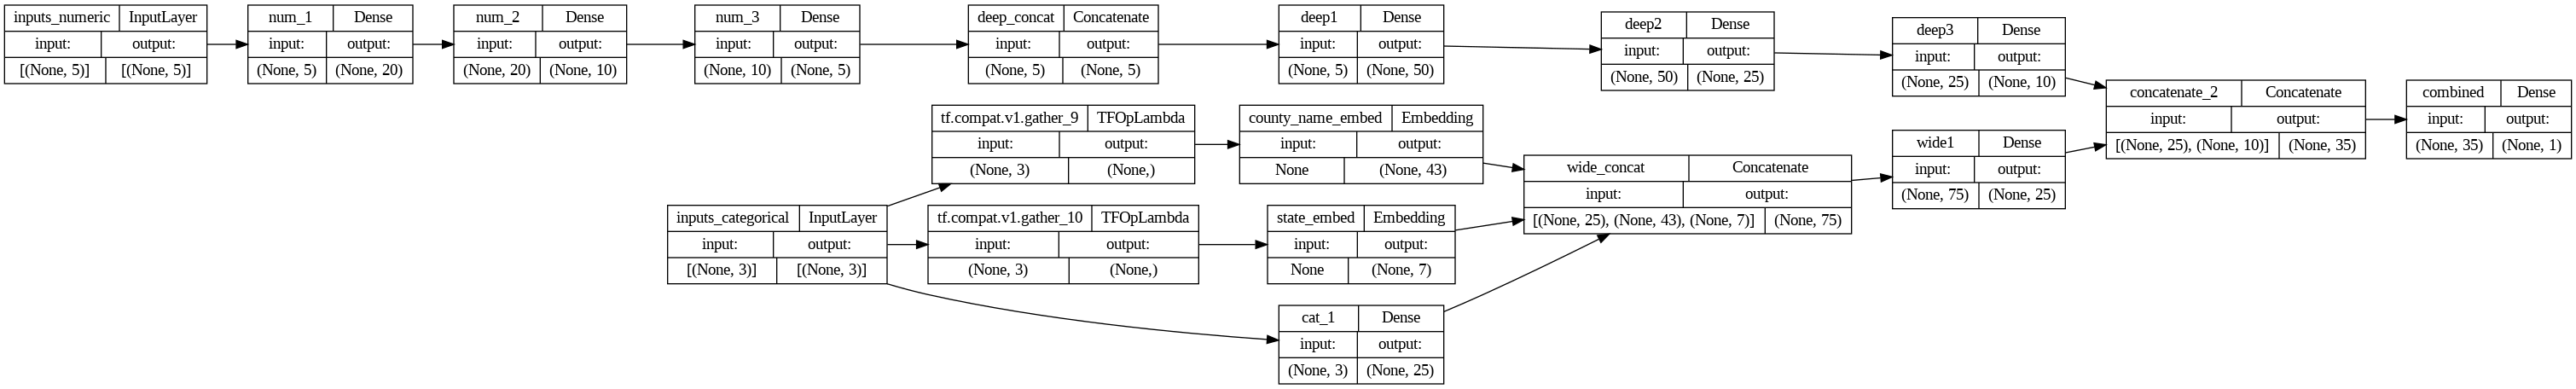

In [113]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

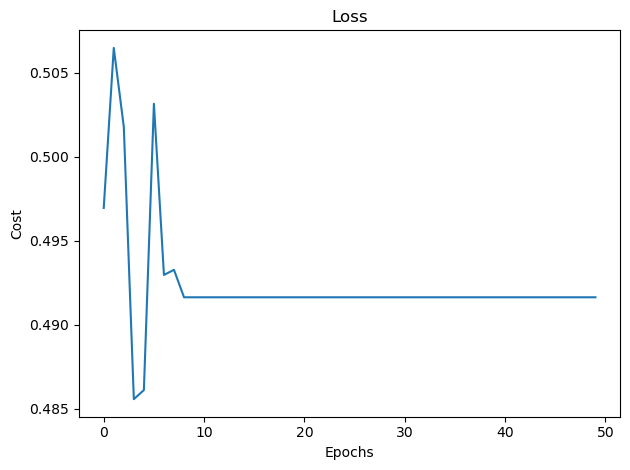

In [175]:
# Variables for determining the loss over epochs
epochs = model_history.epoch
loss = model_history.history["loss"]

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

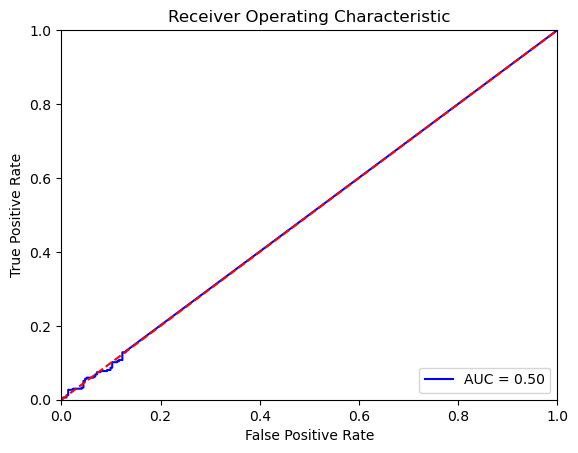

In [176]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

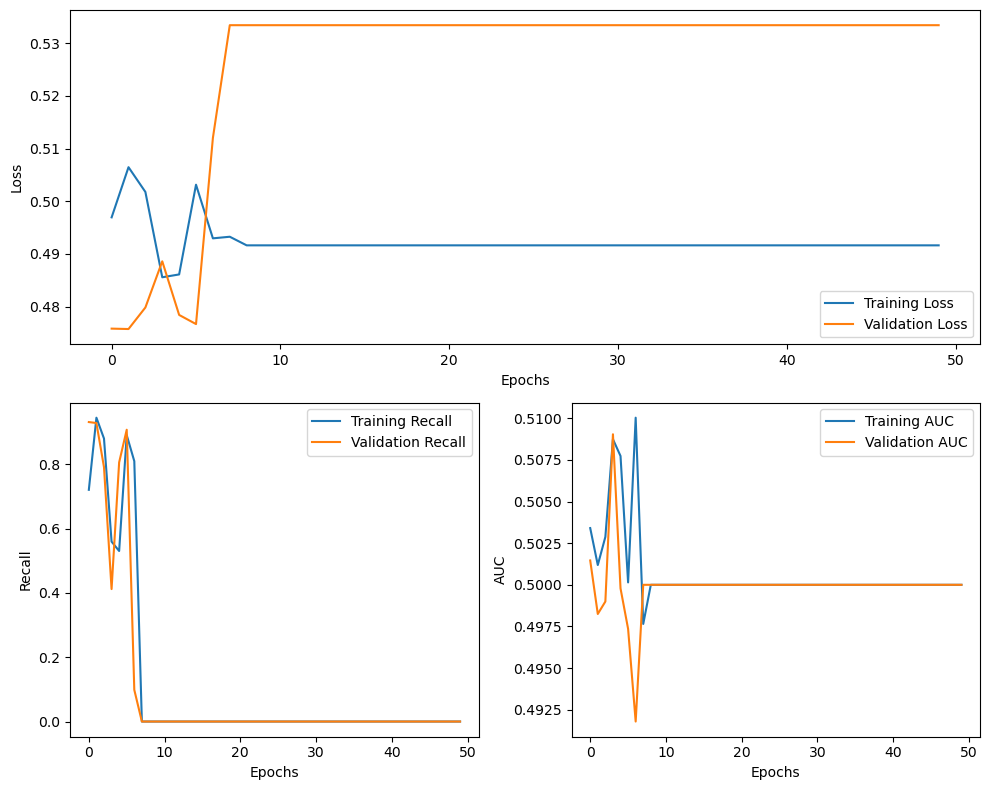

In [177]:
# Model history values
hist_values = list(model_history.history.values())

# Variables for plotting the training versus testing
train_loss   = hist_values[0]
train_recall = hist_values[1]
train_auc    = hist_values[2]
val_loss     = hist_values[3]
val_recall   = hist_values[4]
val_auc      = hist_values[5]

# Plots the training versus testing graph
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, (1, 2))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_recall, label="Training Recall")
plt.plot(val_recall, label="Validation Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_auc, label="Training AUC")
plt.plot(val_auc, label="Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()

plt.show()

In [178]:
# Evaluating performance of the standard Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(
    random_state=123, max_iter=50
)
model_history = mlp_model.fit(
    x_train.loc[:, ~x_train.columns.isin([x_col_features[-1]])], y_train
)
y_predict = mlp_model.predict(x_test.loc[:, ~x_test.columns.isin([x_col_features[-1]])])


In [179]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = mlp_model.predict(x_test.loc[:, ~x_test.columns.isin([x_col_features[-1]])])
y_predict = np.round(y_predict_proba)

# Prints classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.98      0.65       293
           1       0.82      0.07      0.13       335

    accuracy                           0.50       628
   macro avg       0.65      0.53      0.39       628
weighted avg       0.66      0.50      0.37       628



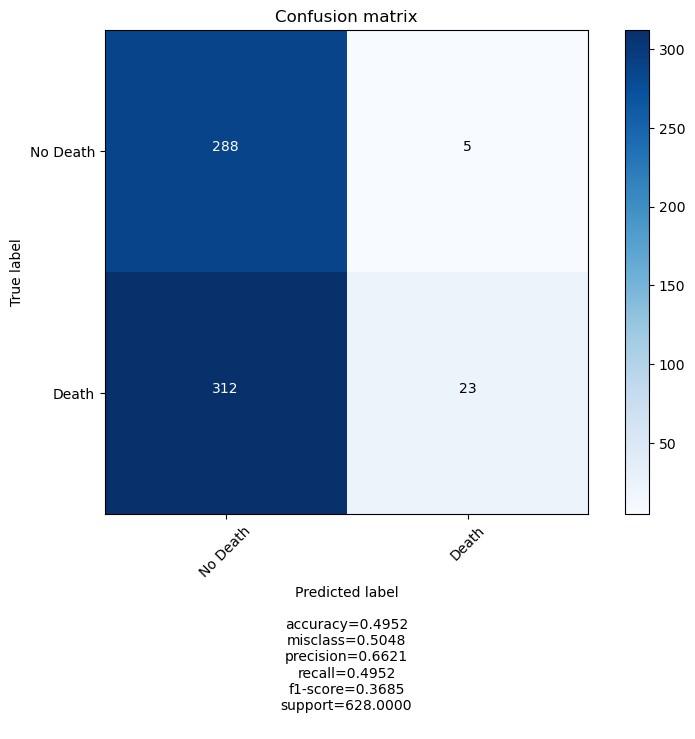

In [180]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

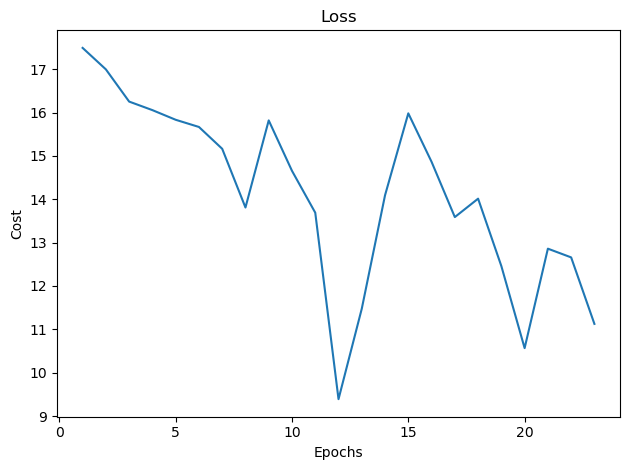

In [181]:
# Variables for determining the loss over epochs
epochs = [i + 1 for i in range(len(model_history.loss_curve_))]
loss = model_history.loss_curve_

# Plots the loss graph
plt.plot(epochs, loss)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Loss")

plt.tight_layout()

plt.show()

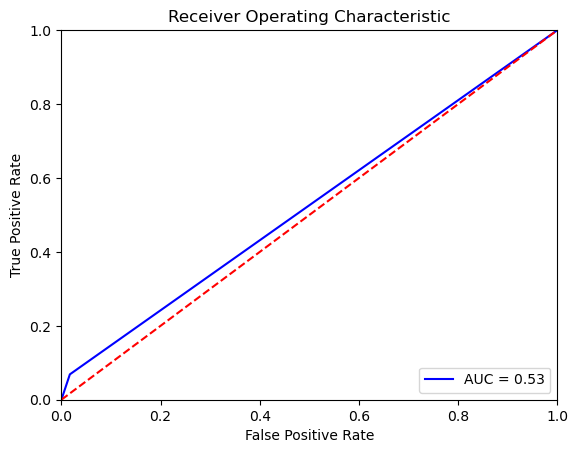

In [182]:
# Variables for determining the ROC/AUC
fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

# Plots the ROC and AUC graph
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Wide and Deep Network #4

In [183]:
# Wide and Deep Network #4 - Capture the embedding weights from the
# deep network and perform dimensionality reduction on the output of these
# embedding layers.

# Step 1: Define data that will be used. Data is converted into numpy format.

# x training data for model
mod_x_train_cross = x_train[x_col_features[:3]].to_numpy()
mod_x_train_categorical = x_train[categorical_features].to_numpy()
mod_x_train_continuous = x_train[
    continuous_features + [x_col_features[-1]]
].to_numpy()

# x testing data for model
mod_x_test_cross = x_test[x_col_features[:3]].to_numpy()
mod_x_test_categorical = x_test[categorical_features].to_numpy()
mod_x_test_continuous = x_test[
    continuous_features + [x_col_features[-1]]
].to_numpy()

# Defines final x-train and x-test variables after all layers have been
# evaluated.
mod_x_train = (
    [mod_x_train_cross] + [mod_x_train_categorical] + [mod_x_train_continuous]
)
mod_x_test = (
    [mod_x_test_cross] + [mod_x_test_categorical] + [mod_x_test_continuous]
)

In [184]:
# Step 2: Define the inputs that will be used
input_cross = Input(
    shape=(mod_x_train_cross.shape[1],), dtype="int64", name="inputs_wide"
)
input_categorical = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_categorical",
)
input_continuous = Input(
    shape=(mod_x_train_continuous.shape[1],),
    dtype="int64",
    name="inputs_numeric",
)
input_reduced_dimensions = Input(
    shape=(mod_x_train_categorical.shape[1],),
    dtype="int64",
    name="inputs_embed_dim_reduced",
)

In [185]:
# Step 3: Define placeholder variables for data input

# Defines outputs
output_cross = []
output_categorical = []
output_continuous = []

# Defines branches
branch_wide = []
branch_deep = []
branch_final = []

In [186]:
# Step 4: Add embeddings for crossed data

# For cross data embeddings...
tmp_train = mod_x_train_cross.T.tolist()
tmp_test = mod_x_test_cross.T.tolist()
tmp_colnames = x_col_features[: mod_x_train_cross.shape[1]]

# Iterates through cross variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_cross, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_cross.append(embedding)

In [187]:
# Step 5: Add embeddings for categorical data

# For categorical embeddings...
tmp_train = mod_x_train_categorical.T.tolist()
tmp_test = mod_x_test_categorical.T.tolist()
tmp_colnames = categorical_features

# Iterates through categorical variables
for i, (col, train_col, test_col) in enumerate(
    zip(tmp_colnames, tmp_train, tmp_test)
):
    # Determines max number of categories for training and testing column.
    n_categories_train = max(train_col)
    n_categories_test = max(test_col)

    # Assigns maximum value (e.g., number of categories)
    n_categories = max(n_categories_train, n_categories_test) + 1

    # Equivalent to branch_input[:, idx]
    x = tf.gather(input_categorical, i, axis=1)

    # Equivalent to dealing with one-hot encoded integers via Embeddings
    embedding = Embedding(
        input_dim=n_categories,
        output_dim=int(np.sqrt(n_categories)),
        input_length=1,
        name=f"{col}_embed",
    )(x)

    # Save output to list
    output_categorical.append(embedding)

In [188]:
# Step 6: Add embeddings to wide branch. Here, the embedded weights are
# named so that the embedding weights can be retrieved later.
branch_cross = keras.layers.concatenate(output_cross, name="embed_cross")
branch_cross = Dense(units=20, activation="sigmoid", name="cross_dim_reduc_1")(
    branch_cross
)

branch_cat = keras.layers.concatenate(output_categorical, name="embed_categorical")
branch_cat = Dense(units=20, activation="sigmoid", name="cat_dim_reduc_1")(
    branch_cat
)

branch_wide = keras.layers.concatenate(
    [branch_cross, branch_cat], name="concat_embeds"
)
branch_wide = Dense(units=20, activation="sigmoid", name="concat_embeds_1")(
    branch_wide
)

In [189]:
# Step 7: Add branch for continuous (numeric) data

# For continuous features...
# Adds dense layer to continuous input
x_dense = Dense(units=20, activation="relu", name="num_1")(input_continuous)
x_dense = Dense(units=10, activation="relu", name="num_2")(x_dense)
x_dense = Dense(units=5, activation="relu", name="num_3")(x_dense)

In [190]:
# Step 8: Add dense layer to deep branch
branch_deep.append(x_dense)
branch_deep.append(branch_cross)

In [191]:
# Step 9: Merge the deep branches
branch_deep = keras.layers.concatenate(branch_deep, name="concat_conts")
branch_deep = Dense(units=50, activation="relu", name="deep1")(branch_deep)
branch_deep = Dense(units=25, activation="relu", name="deep2")(branch_deep)
branch_deep = Dense(units=10, activation="relu", name="deep3")(branch_deep)

In [192]:
# Step 10: Merge the deep and wide branches
branch_final = keras.layers.concatenate([branch_wide, branch_deep])

In [193]:
# Step 10: Add dense layer to final branch
branch_final = Dense(units=10, activation="sigmoid", name="combined")(
    branch_final
)
branch_final = Dense(units=1, activation="sigmoid", name="combined_f")(
    branch_final
)

In [194]:
# Step 11: Build model
model = Model(
    inputs=[input_cross, input_categorical, input_continuous],
    outputs=branch_final,
)

In [195]:
# Step 12: Compile model
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [196]:
# Prints the model summary
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs_wide (InputLayer)    [(None, 3)]                  0         []                            
                                                                                                  
 tf.compat.v1.gather_23 (TF  (None,)                      0         ['inputs_wide[0][0]']         
 OpLambda)                                                                                        
                                                                                                  
 tf.compat.v1.gather_24 (TF  (None,)                      0         ['inputs_wide[0][0]']         
 OpLambda)                                                                                        
                                                                                            

                                                                                                  
 concatenate_5 (Concatenate  (None, 30)                   0         ['concat_embeds_1[0][0]',     
 )                                                                   'deep3[0][0]']               
                                                                                                  
 combined (Dense)            (None, 10)                   310       ['concatenate_5[0][0]']       
                                                                                                  
 combined_f (Dense)          (None, 1)                    11        ['combined[0][0]']            
                                                                                                  
Total params: 569432 (2.17 MB)
Trainable params: 569432 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [197]:
# Step 13: Fits model to training data
model_history = model.fit(
    mod_x_train,
    y_train,
    epochs=50,
    batch_size=50,
    validation_data=([mod_x_test], y_test),
    verbose=1,
)

Epoch 1/50
51/51 [==============================] - 2s 11ms/step - loss: 0.2646 - recall_6: 0.0000e+00 - auc_5: 0.4868 - val_loss: 0.2659 - val_recall_6: 0.0000e+00 - val_auc_5: 0.5023
Epoch 2/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2547 - recall_6: 0.0413 - auc_5: 0.4921 - val_loss: 0.2500 - val_recall_6: 0.8358 - val_auc_5: 0.4872
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2507 - recall_6: 0.5344 - auc_5: 0.5083 - val_loss: 0.2520 - val_recall_6: 0.2418 - val_auc_5: 0.5272
Epoch 4/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2509 - recall_6: 0.1206 - auc_5: 0.4799 - val_loss: 0.2531 - val_recall_6: 0.0000e+00 - val_auc_5: 0.5044
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.2490 - recall_6: 0.1101 - auc_5: 0.5254 - val_loss: 0.2523 - val_recall_6: 0.0716 - val_auc_5: 0.5043
Epoch 6/50
51/51 [==============================] - 0s 7ms/step - loss: 0.2234 - recall_6: 0.4713 - auc_5: 

Epoch 47/50
51/51 [==============================] - 0s 6ms/step - loss: 3.1534e-04 - recall_6: 1.0000 - auc_5: 1.0000 - val_loss: 0.4101 - val_recall_6: 0.8209 - val_auc_5: 0.5038
Epoch 48/50
51/51 [==============================] - 0s 6ms/step - loss: 3.0220e-04 - recall_6: 1.0000 - auc_5: 1.0000 - val_loss: 0.4107 - val_recall_6: 0.8209 - val_auc_5: 0.5033
Epoch 49/50
51/51 [==============================] - 0s 6ms/step - loss: 2.8984e-04 - recall_6: 1.0000 - auc_5: 1.0000 - val_loss: 0.4112 - val_recall_6: 0.8209 - val_auc_5: 0.5042
Epoch 50/50
51/51 [==============================] - 0s 6ms/step - loss: 2.7815e-04 - recall_6: 1.0000 - auc_5: 1.0000 - val_loss: 0.4120 - val_recall_6: 0.8209 - val_auc_5: 0.5025


## Wide and Deep Network #4 Visualization

In [198]:
# Defines the y-prediction probability and y-prediction arrays
y_predict_proba = model.predict(mod_x_test)  # sigmoid output probabilities
y_predict = np.round(y_predict_proba)  # round to get binary class

# Prints classification report
print(classification_report(y_test, y_predict))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.45      0.17      0.25       293
           1       0.53      0.82      0.64       335

    accuracy                           0.52       628
   macro avg       0.49      0.50      0.45       628
weighted avg       0.50      0.52      0.46       628



For this run, our accuracy score increases to .5175 or about 52% accuracy.

The missclass score decreases to .4825 or 48%.

In this case, the precision score increased to .4953 or 50%.

Our recall score for this run increased to .5175 or 52%.

The F1-score for this run increased to .4597 or 46%.

Our support score for this run remained at 628.

Overall, the metrics for the proposed model all saw a minimal increase, but the scores are still nowhere near substantial enough to determine the validity of the model in actual field work.

However, we do notice that both the false negative and true negative scores decreased - which may indicate that the model is no longer being affected by overfitting. 

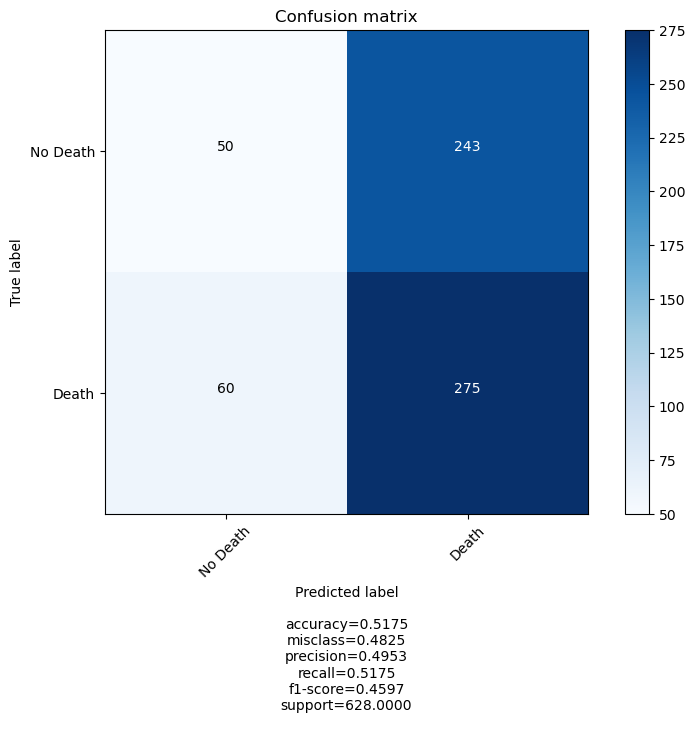

In [199]:
# Plots the confusion matrix
class_report = classification_report(y_test, y_predict, output_dict=True)
plot_confusion_matrix(
    confusion_matrix(y_test, y_predict),
    ["No Death", "Death"],
    normalize=False,
    class_results=class_report["weighted avg"],
)

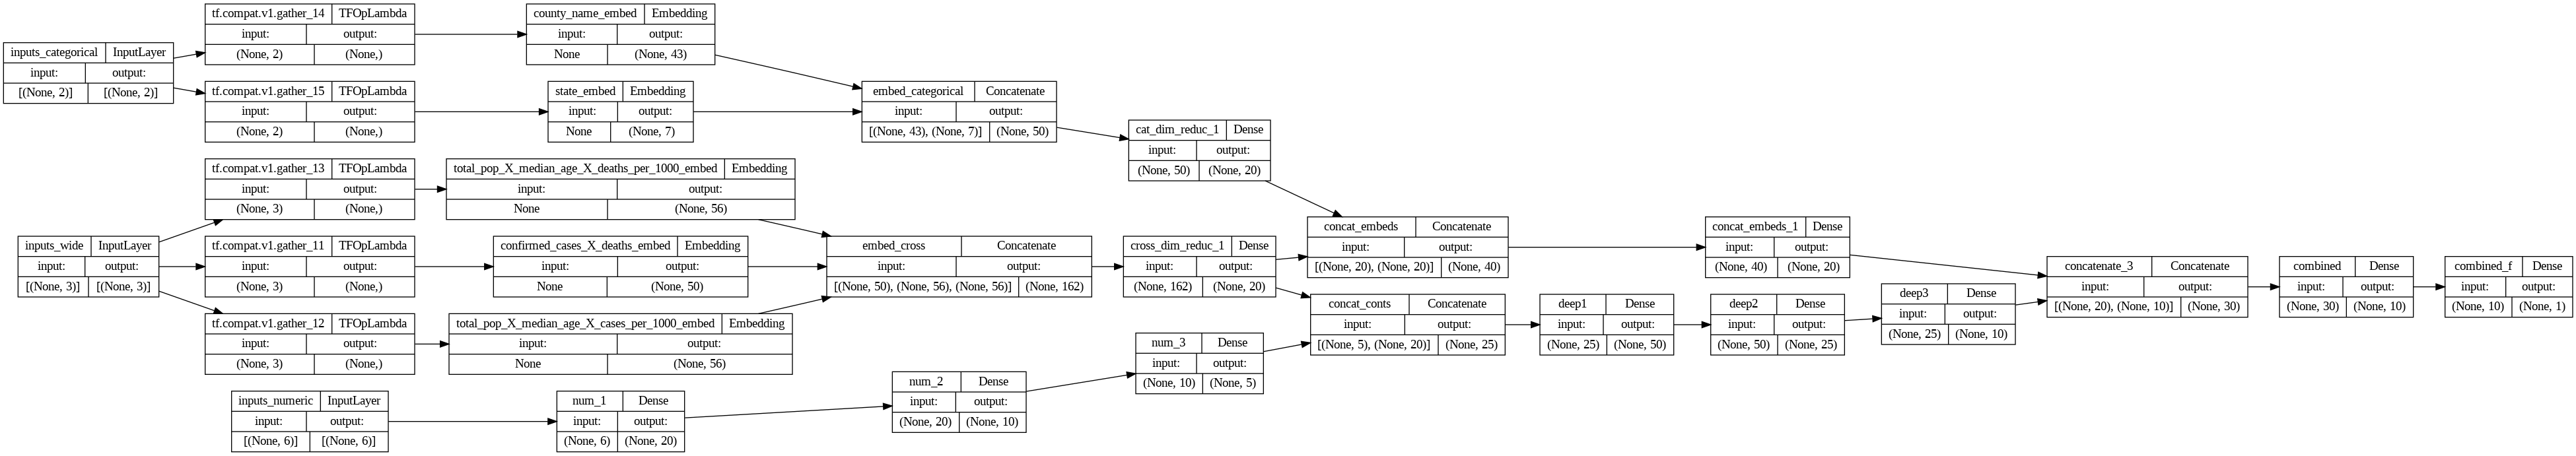

In [139]:
# Plots the graph
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
)

# Dimensionality Reduction

In [139]:
for layer in model.layers:
    name = layer.name
    weights_and_bias = layer.get_weights()
    if len(weights_and_bias) == 2:
        weights, bias = weights_and_bias
        print(f"----- {name} -----")
        print(f"Weights Shape: {weights.shape}")
        print(f"Bias Shape: {bias.shape}")

----- num_1 -----
Weights Shape: (6, 20)
Bias Shape: (20,)
----- num_2 -----
Weights Shape: (20, 10)
Bias Shape: (10,)
----- cross_dim_reduc_1 -----
Weights Shape: (162, 20)
Bias Shape: (20,)
----- num_3 -----
Weights Shape: (10, 5)
Bias Shape: (5,)
----- cat_dim_reduc_1 -----
Weights Shape: (51, 20)
Bias Shape: (20,)
----- deep1 -----
Weights Shape: (25, 50)
Bias Shape: (50,)
----- deep2 -----
Weights Shape: (50, 25)
Bias Shape: (25,)
----- concat_embeds_1 -----
Weights Shape: (40, 20)
Bias Shape: (20,)
----- deep3 -----
Weights Shape: (25, 10)
Bias Shape: (10,)
----- combined -----
Weights Shape: (30, 10)
Bias Shape: (10,)
----- combined_f -----
Weights Shape: (10, 1)
Bias Shape: (1,)


KeyError: 'total_pop_X_median_age_X_cases_per_1000_embed'

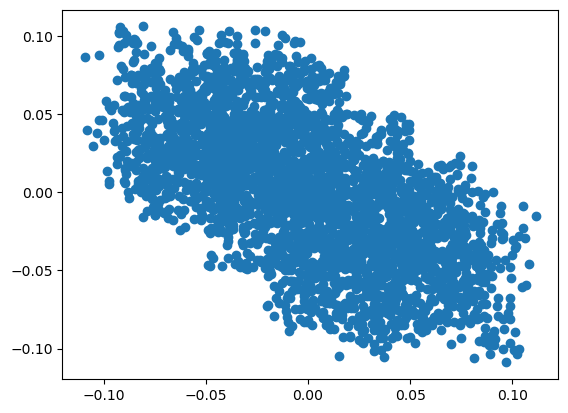

In [140]:
layer = model.get_layer("total_pop_X_median_age_X_cases_per_1000_embed")
x_coords = layer.get_weights()[0][:, 0]
y_coords = layer.get_weights()[0][:, 1]
plt.scatter(x_coords, y_coords)
for label, x, y in zip(
    df["total_pop_X_median_age_X_cases_per_1000_embed"].unique().tolist(), x_coords, y_coords
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-1, 1),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )

plt.show()

KeyError: 'total_pop_X_median_age_X_deaths_per_1000_embed'

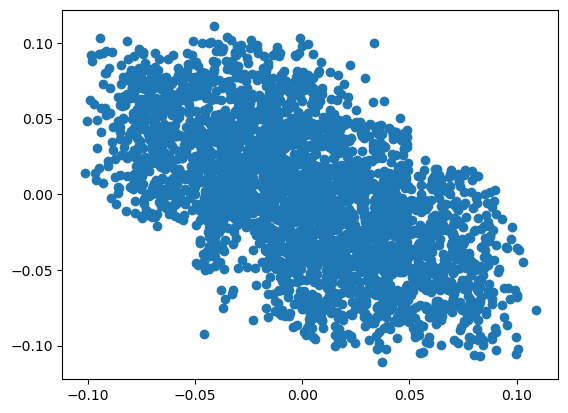

In [141]:
layer = model.get_layer("total_pop_X_median_age_X_deaths_per_1000_embed")
x_coords = layer.get_weights()[0][:, 0]
y_coords = layer.get_weights()[0][:, 1]
plt.scatter(x_coords, y_coords)
for label, x, y in zip(
    df["total_pop_X_median_age_X_deaths_per_1000_embed"].unique().tolist(), x_coords, y_coords
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-1, 1),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )

plt.show()

----- cross_dim_reduc_1 -----
Weights Shape: (162, 20)
Bias Shape: (20,)


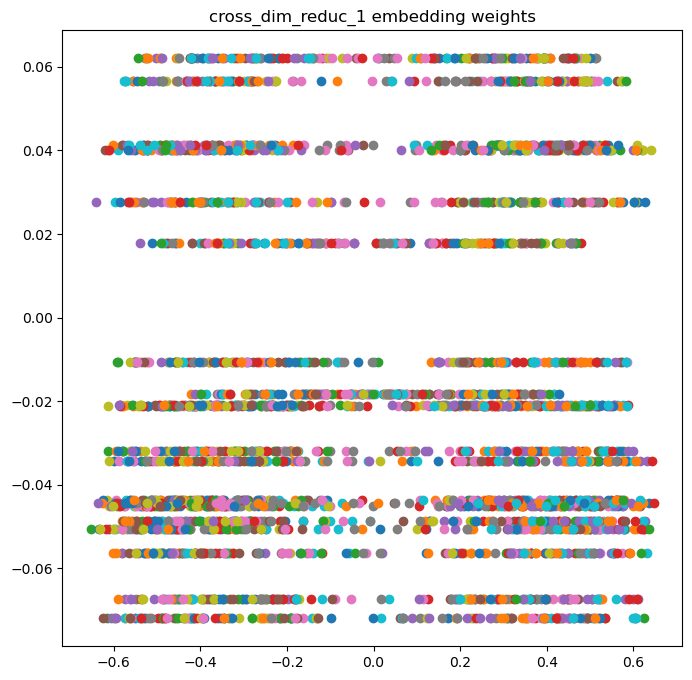

In [142]:
plt.figure(figsize=(8, 8))
layer = model.get_layer("cross_dim_reduc_1")
name = layer.name
weights_and_bias = layer.get_weights()
if len(weights_and_bias) == 2:
    weights, bias = weights_and_bias
    print(f"----- {name} -----")
    print(f"Weights Shape: {weights.shape}")
    print(f"Bias Shape: {bias.shape}")
    for weight in weights:
        plt.plot(weight, bias, 'o')

plt.title(name + " embedding weights")
plt.show()

----- cat_dim_reduc_1 -----
Weights Shape: (51, 20)
Bias Shape: (20,)


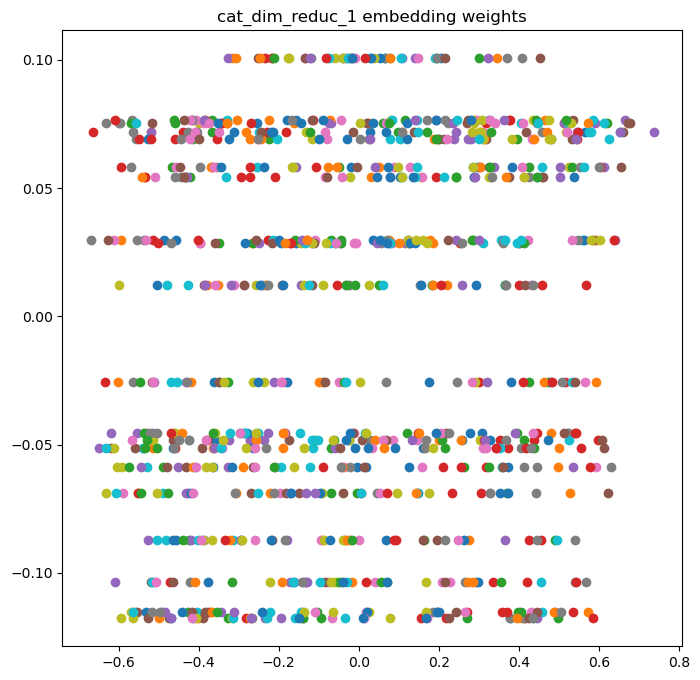

In [143]:
plt.figure(figsize=(8, 8))
layer = model.get_layer("cat_dim_reduc_1")
name = layer.name
weights_and_bias = layer.get_weights()
if len(weights_and_bias) == 2:
    weights, bias = weights_and_bias
    print(f"----- {name} -----")
    print(f"Weights Shape: {weights.shape}")
    print(f"Bias Shape: {bias.shape}")
    for weight in weights:
        plt.plot(weight, bias, 'o')

plt.title(name + " embedding weights")
plt.show()

In examining the embedding weights associated with categorical features, we identified a characteristic pattern reminiscent of the crossed features. The visualization reveals a dense and horizontally spread arrangement, where the weights are evenly distributed across the plot. Notably, the spread of weights exhibits a bilaterally symmetrical pattern, extending from negative to positive values.

The dense horizontal spread suggests a diverse representation of categorical features, indicating that a broad range of these features contributes to the model's understanding. The even distribution of weights implies that, on the whole, the model assigns a relatively consistent level of importance to various categorical features.

The bilaterally symmetrical nature of the weight spread, extending from negative to positive values, indicates a balanced consideration of both positive and negative influences. This symmetry suggests that the model is responsive to a spectrum of feature characteristics, capturing not only the presence but also the absence of certain categorical attributes.

Understanding the symmetrical spread of weights can be valuable for interpreting the impact of individual categorical features on the model's predictions. Features with positive weights may positively contribute to the predicted outcome, while those with negative weights may have a negative impact.

In summary, the observed characteristics of the categorical features' embedding weights, including a dense horizontal spread and bilaterally symmetrical weight distribution, provide insights into the model's handling of categorical information. This understanding can aid in deciphering the importance and influence of specific categorical features on the model's predictions.

----- concat_embeds_1 -----
Weights Shape: (40, 20)
Bias Shape: (20,)


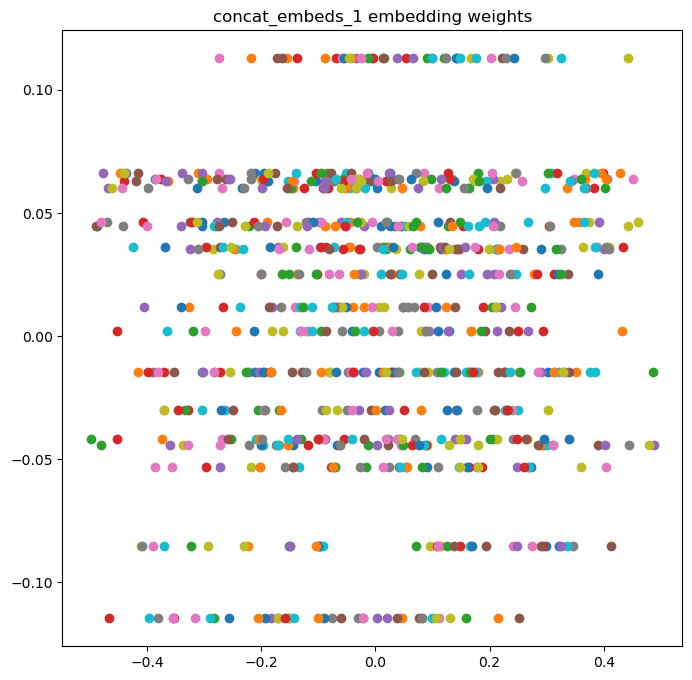

In [144]:
plt.figure(figsize=(8, 8))
layer = model.get_layer("concat_embeds_1")
name = layer.name
weights_and_bias = layer.get_weights()
if len(weights_and_bias) == 2:
    weights, bias = weights_and_bias
    print(f"----- {name} -----")
    print(f"Weights Shape: {weights.shape}")
    print(f"Bias Shape: {bias.shape}")
    for weight in weights:
        plt.plot(weight, bias, 'o')

plt.title(name + " embedding weights")
plt.show()

In analyzing the concatenated categorical and crossed feature embedding weights, we noted a distinct pattern similar to the preceding two plots. The embedding weights exhibit clustering in multiple horizontal layers, portraying a nuanced distribution. While the majority of the prominent clusters are concentrated around the central region of the plot, it's noteworthy that a few clusters are also dispersed towards the outer edges.

This divergence in the distribution of clusters suggests a more intricate relationship among the features represented by the embedding weights. The clustering near the center may indicate a collective influence or shared characteristics among certain feature combinations. Meanwhile, the presence of clusters along the outer edges implies the existence of distinct groups with unique attributes or interactions.

This observation prompts further exploration into the specific characteristics and interactions represented by these clusters. Understanding the patterns in both the central and outer regions of the plot could unveil valuable insights into the relationships among the concatenated categorical and crossed features. It may also indicate varying degrees of importance or significance associated with different feature combinations.

In summary, the distinctive plot of the concatenated categorical and crossed feature embedding weights, with clusters arranged in horizontal layers and varying concentrations towards the center and outer edges, suggests a rich and nuanced interplay among the represented features. Further investigation into the characteristics of these clusters can offer deeper insights into the underlying relationships and contribute to a more comprehensive understanding of the feature interactions in the model.

# References

[1] https://krishnayogi.medium.com/the-power-of-feature-crosses-real-life-use-cases-and-code-af7b47218444

[2] https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

[3] https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3#:~:text=The%20Mean%20Squared%20Error%20(MSE,out%20across%20the%20whole%20dataset.

[4] https://www.statology.org/sklearn-classification-report/
https://www.evidentlyai.com/classification-metrics/explain-roc-curve#:~:text=ROC%20AUC%20score%20shows%20how,have%20an%20AUC%20of%200.5.